In [1]:
import os
os.chdir("../")
import numpy as np

## Data Visualisation

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 250
from IPython.display import display

In [3]:
file_path = "data/glyph/"
sans_df = np.load(file_path + 'sans_serif.pkl', allow_pickle=True)
test_sans_df = np.load(file_path + 'test_sans_serif.pkl', allow_pickle=True)

serif_df = np.load(file_path + 'serif.pkl', allow_pickle=True)
test_serif_df = np.load(file_path + 'test_serif.pkl', allow_pickle=True)

In [4]:
total_sans = pd.concat([sans_df, test_sans_df])
total_serif = pd.concat([serif_df, test_serif_df])

/tmp/ipykernel_389410/2175960962.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  sans_plt.axes.set_yticklabels([int(ytick) for ytick in sans_plt.get_yticks()],
/tmp/ipykernel_389410/2175960962.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  serif_plt.axes.set_yticklabels([int(ytick) for ytick in sans_plt.get_yticks()],


[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9')]

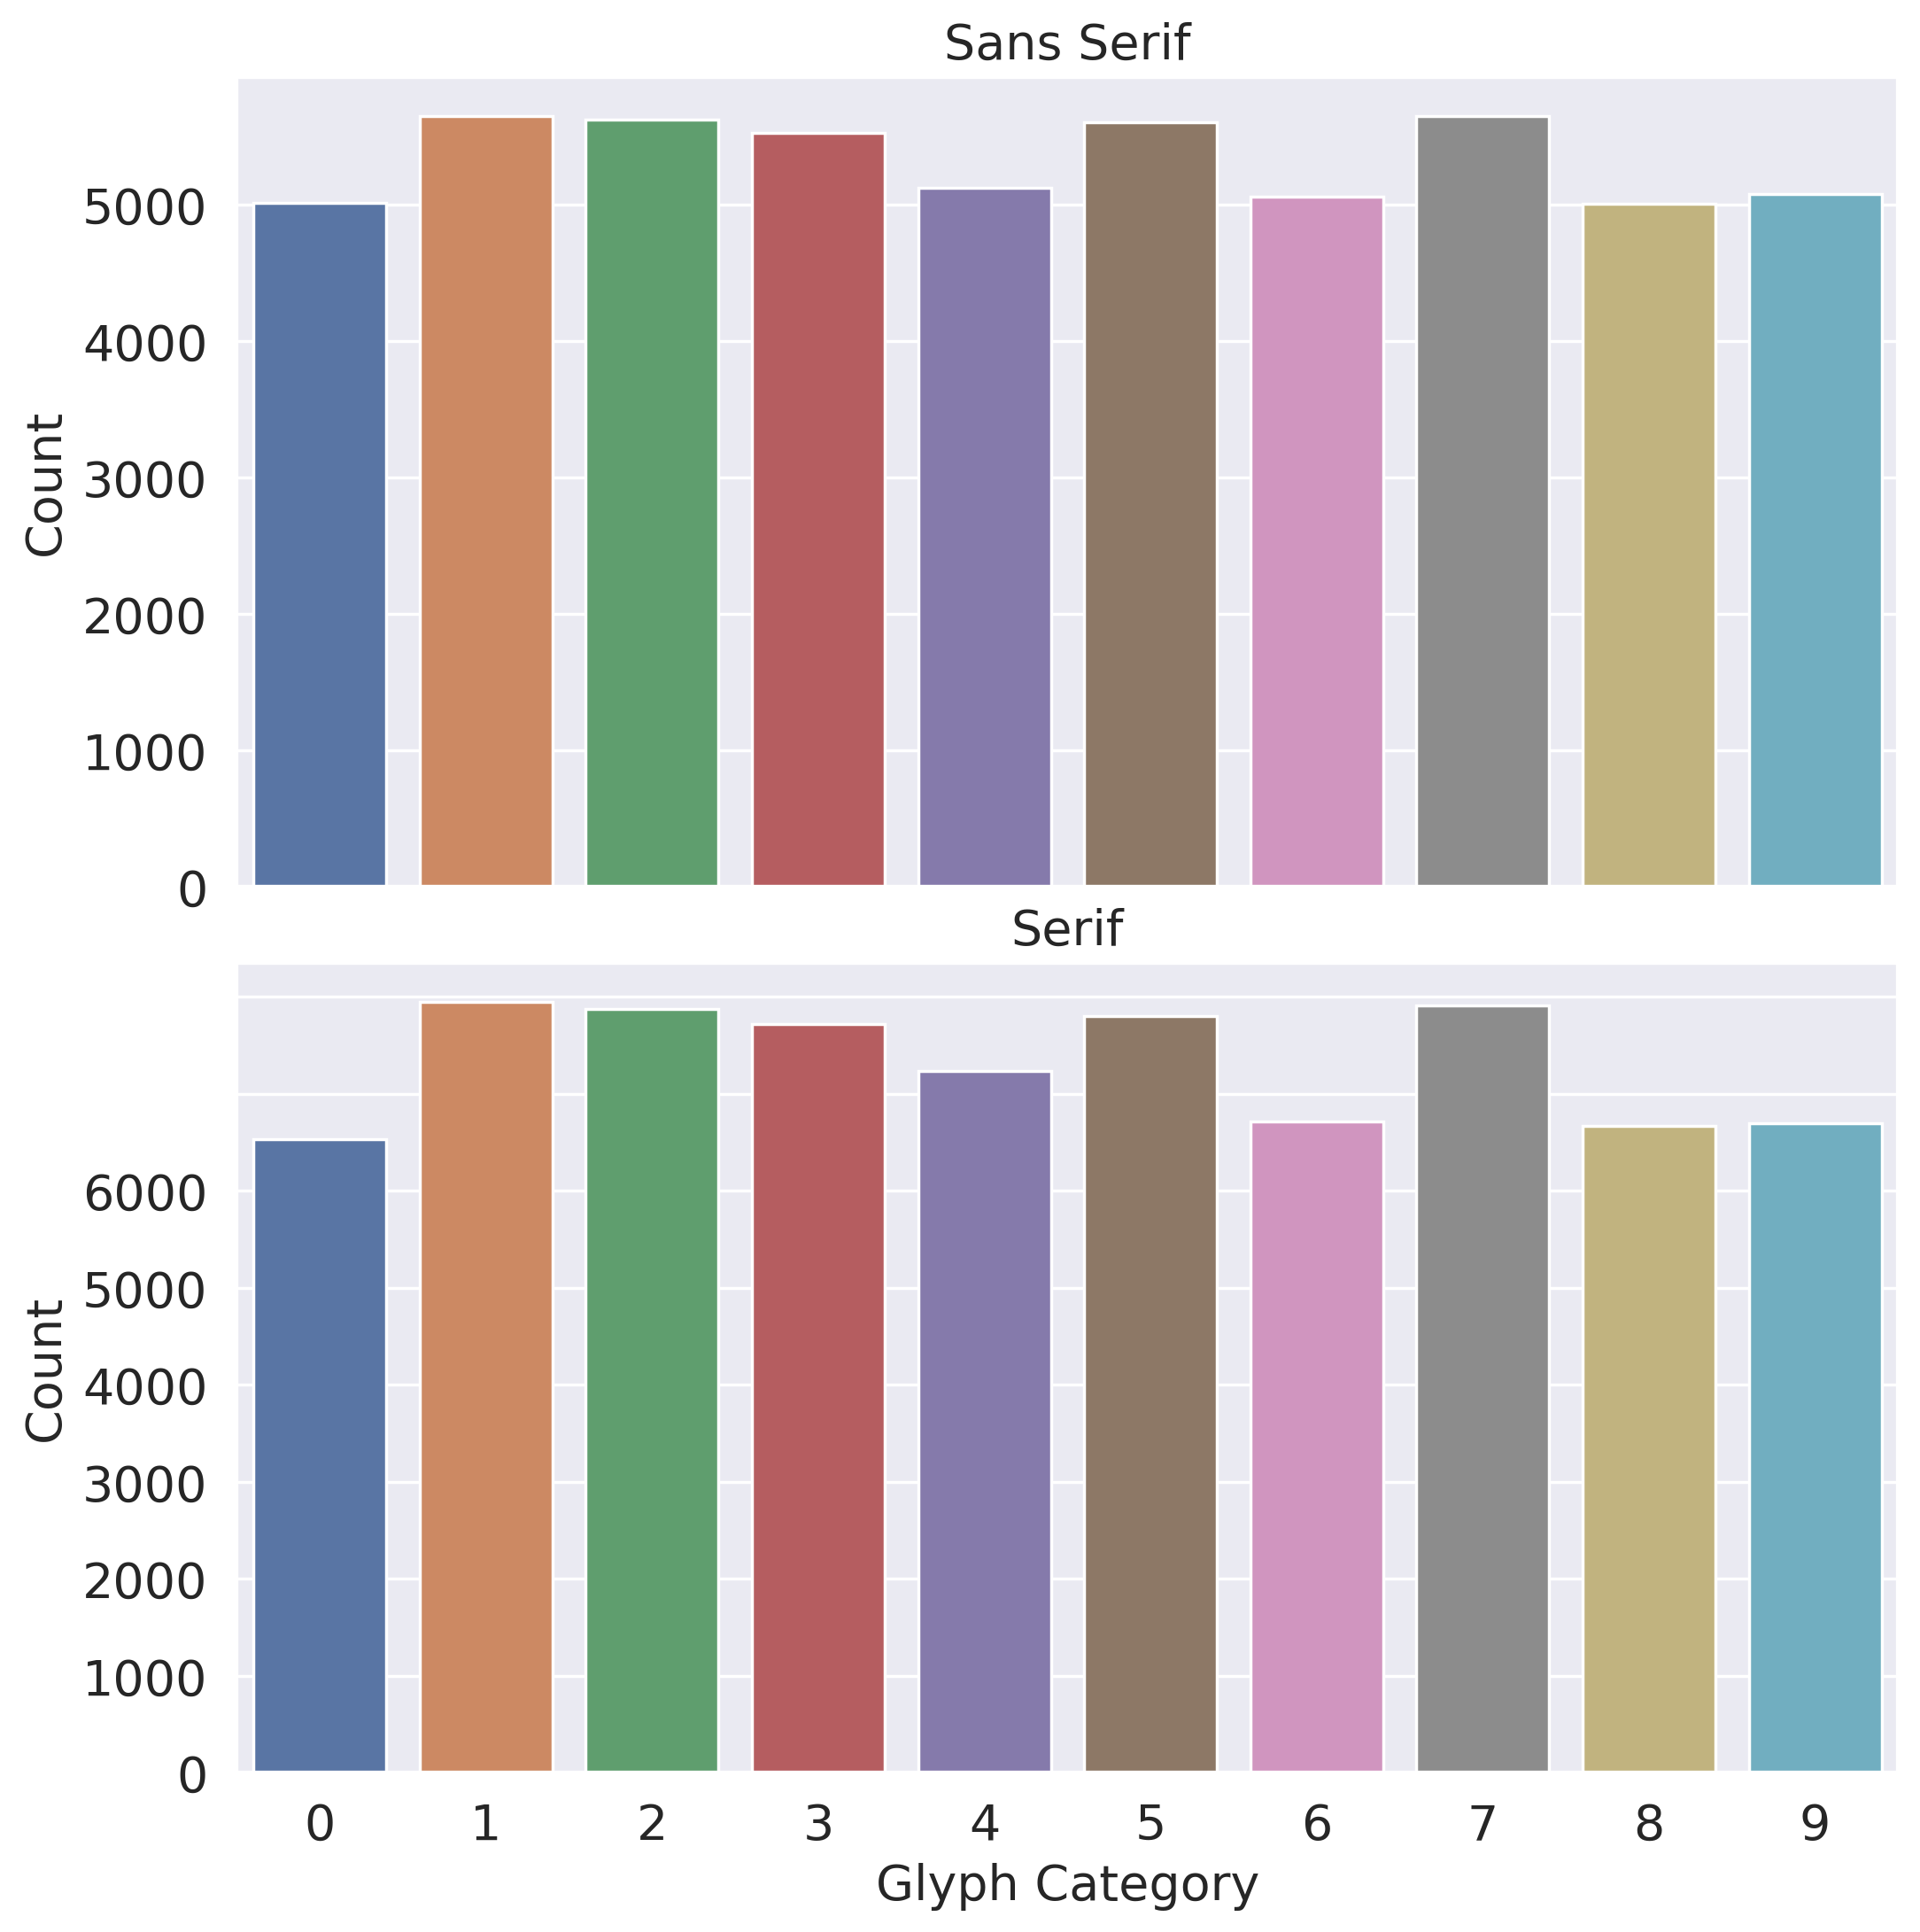

In [5]:
import seaborn as sns
sns.set_theme(style="darkgrid")

fig, axs = plt.subplots(2, 1, figsize=(8, 8))
fig.tight_layout(pad=0.0, w_pad=0.0, h_pad=0.0)

font_weight = None 
font_size = 16

total_sans = total_sans.rename(columns={'value':'Glyph class'})
sans_plt = sns.countplot(x='Glyph class', data=total_sans, ax=axs[0])
sans_plt.axes.set_title('Sans Serif', fontsize=font_size, weight=font_weight)
sans_plt.axes.set_ylabel('Count',fontsize=font_size, weight=font_weight)
sans_plt.axes.set_yticklabels([int(ytick) for ytick in sans_plt.get_yticks()],
                              fontsize=font_size, 
                              weight=font_weight)
sans_plt.set(xticklabels=[])
sans_plt.set(xlabel=None)

total_serif = total_serif.rename(columns={'value':'Glyph class'})
serif_plt = sns.countplot(x='Glyph class', data=total_serif, ax=axs[1])
serif_plt.axes.set_title('Serif', fontsize=font_size, weight=font_weight)
serif_plt.axes.set_ylabel('Count',fontsize=font_size, weight=font_weight)
serif_plt.axes.set_xlabel('Glyph Category',fontsize=font_size, weight=font_weight)
serif_plt.axes.set_yticklabels([int(ytick) for ytick in sans_plt.get_yticks()],
                               fontsize=font_size, 
                               weight=font_weight)
serif_plt.axes.set_xticklabels([int(xtick) for xtick in sans_plt.get_xticks()],
                               fontsize=font_size, 
                               weight=font_weight)

In [6]:
sans_robust_df = np.load(file_path + 'sans_serif_robust.pkl', allow_pickle=True)
test_sans_robust_df = np.load(file_path + 'test_sans_serif_robust.pkl', allow_pickle=True)

serif_robust_df = np.load(file_path + 'serif_robust.pkl', allow_pickle=True)
test_serif_robust_df = np.load(file_path + 'test_serif_robust.pkl', allow_pickle=True)

total_sans_robust = pd.concat([sans_robust_df, test_sans_robust_df])
total_serif_robust = pd.concat([serif_robust_df, test_serif_robust_df])

/tmp/ipykernel_389410/3346166686.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  sans_plt.axes.set_yticklabels([int(ytick) for ytick in sans_plt.get_yticks()],
/tmp/ipykernel_389410/3346166686.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  serif_plt.axes.set_yticklabels([int(ytick) for ytick in sans_plt.get_yticks()],


[Text(0, 0, '0'),
 Text(1, 0, 'O'),
 Text(2, 0, '1'),
 Text(3, 0, 'I'),
 Text(4, 0, '2'),
 Text(5, 0, 'Z'),
 Text(6, 0, '8'),
 Text(7, 0, 'B')]

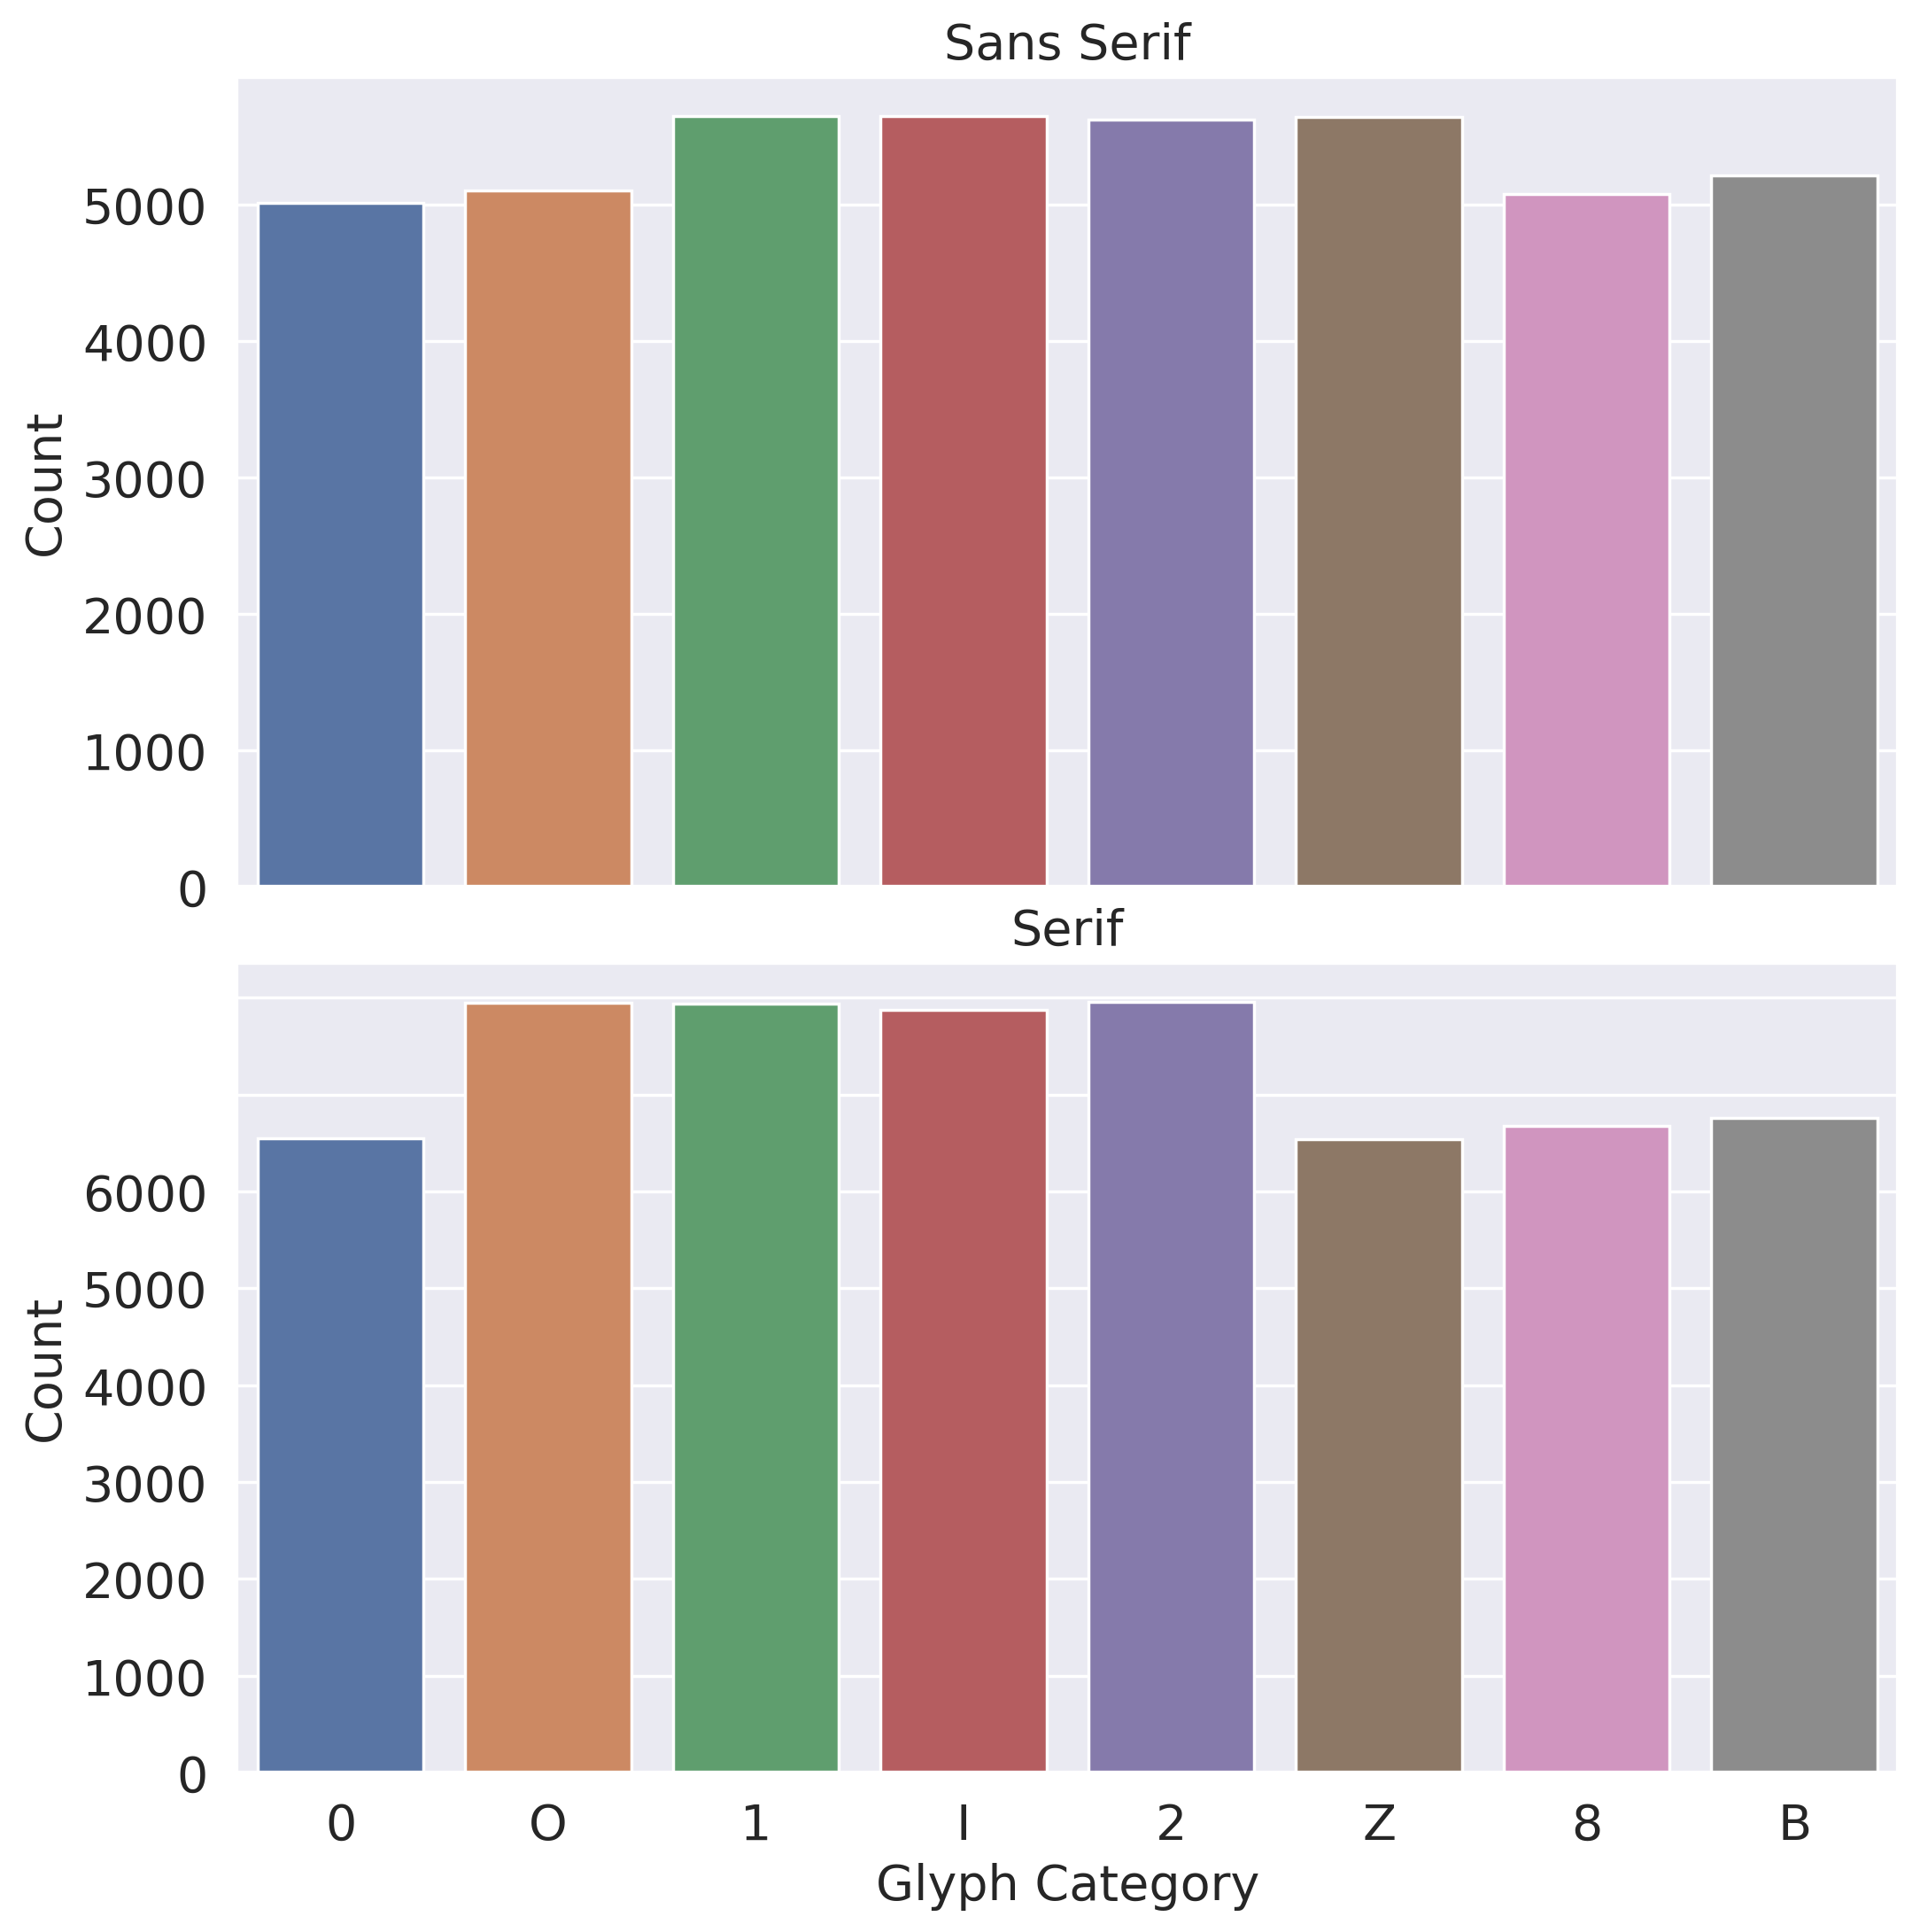

In [7]:

fig, axs = plt.subplots(2, 1, figsize=(8, 8))
fig.tight_layout(pad=0.0, w_pad=0.0, h_pad=0.0)

total_sans_robust = total_sans_robust.rename(columns={'value':'Glyph class'})
sans_plt = sns.countplot(x='Glyph class', data=total_sans_robust, ax=axs[0])
sans_plt.axes.set_title('Sans Serif', fontsize=font_size, weight=font_weight)
sans_plt.axes.set_ylabel('Count',fontsize=font_size, weight=font_weight)
sans_plt.axes.set_yticklabels([int(ytick) for ytick in sans_plt.get_yticks()],
                              fontsize=font_size, 
                              weight=font_weight)
sans_plt.set(xticklabels=[])
sans_plt.set(xlabel=None)

total_serif_robust = total_serif_robust.rename(columns={'value':'Glyph class'})
serif_plt = sns.countplot(x='Glyph class', data=total_serif_robust, ax=axs[1])
serif_plt.axes.set_title('Serif', fontsize=font_size, weight=font_weight)
serif_plt.axes.set_ylabel('Count',fontsize=font_size, weight=font_weight)
serif_plt.axes.set_xlabel('Glyph Category',fontsize=font_size, weight=font_weight)
serif_plt.axes.set_yticklabels([int(ytick) for ytick in sans_plt.get_yticks()],
                               fontsize=font_size, 
                               weight=font_weight)
serif_plt.axes.set_xticklabels(['0', 'O', '1', 'I', '2', 'Z', '8', 'B'],
                               fontsize=font_size, 
                               weight=font_weight)

In [8]:
import torch
from torch.utils.data import DataLoader
from data.transform import ToFixedTensor

from utils.metric import Metrics
from data.torch_dataset import GlyphGeom
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [9]:
@torch.no_grad()
def validation(loader, model, criterion, out_channels=10):
    metr = Metrics(out_channels)
    model.eval()
    for idx, data in enumerate(loader):
        x = data['geom'].to(torch.device(device), dtype=torch.float)
        y = data['value'].to(torch.device(device))

        logits = model(x)
        loss = criterion(logits, y)

        metr.update_cm(logits, y)
        metr.update_loss(loss)
    
    print(f"Avg Valid Loss: {metr.avg_loss():.4f} \n"
          f"Overall Valid Acc: {metr.accuracy():.4f} \n"
          f"{'-' * 80}") 
    return metr, metr.avg_loss()

In [10]:
from model.net import CNN, Deepset, GCNN, SetTransformer

def build_model(nn, checkpoint_name=None, out_channels=10):
    if nn == 'cnn':
        model = CNN(3, out_channels)
    elif nn == 'deepset':
        model = Deepset(3, out_channels, 2048)
    elif nn == 'gcnn':
        model = GCNN(3, out_channels, 2048)
    elif nn == 'transformer':
        model = SetTransformer(3, out_channels, 512)
    
    checkpoint=torch.load('saved/'+f'{checkpoint_name}.pth')
    model.load_state_dict(checkpoint['model_state'])

    model.to(torch.device(device))
    criterion = torch.nn.CrossEntropyLoss()
    
    return model, criterion

## Glyph Geometry

In [11]:
serif_o = test_serif_df[test_serif_df['type']=='o']
serif_r = test_serif_df[test_serif_df['type']=='r']
serif_s = test_serif_df[test_serif_df['type']=='s']
serif_d = test_serif_df[test_serif_df['type']=='d']

sans_o = test_sans_df[test_sans_df['type']=='o']
sans_r = test_sans_df[test_sans_df['type']=='r']
sans_s = test_sans_df[test_sans_df['type']=='s']
sans_d = test_sans_df[test_sans_df['type']=='d']

In [12]:
test_serif_o = GlyphGeom(data_dir=file_path, dataframe=serif_o, transform=ToFixedTensor(1500))
test_serif_r = GlyphGeom(data_dir=file_path, dataframe=serif_r, transform=ToFixedTensor(1500))
test_serif_s = GlyphGeom(data_dir=file_path, dataframe=serif_s, transform=ToFixedTensor(1500))
test_serif_d = GlyphGeom(data_dir=file_path, dataframe=serif_d, transform=ToFixedTensor(1500))

test_sans_o = GlyphGeom(data_dir=file_path, dataframe=sans_o, transform=ToFixedTensor(1500))
test_sans_r = GlyphGeom(data_dir=file_path, dataframe=sans_r, transform=ToFixedTensor(1500))
test_sans_s = GlyphGeom(data_dir=file_path, dataframe=sans_s, transform=ToFixedTensor(1500))
test_sans_d = GlyphGeom(data_dir=file_path, dataframe=sans_d, transform=ToFixedTensor(1500))

In [13]:
# Original
test_loader = DataLoader(test_serif_o, batch_size=64, shuffle=True)

# CNN
model, criterion = build_model('cnn', 'cnn/sans_serif')
metr_cnn_o, _ = validation(test_loader, model, criterion)

# Deepset
model, criterion = build_model('deepset', 'deepset/sans_serif')
metr_deepset_o, _ = validation(test_loader, model, criterion)

# GCNN
model, criterion = build_model('gcnn', 'gcnn/sans_serif')
metr_gcnn_o, _ = validation(test_loader, model, criterion)

# SetTransformer
model, criterion = build_model('transformer', 'transformer/sans_serif')
metr_setTr_o, _ = validation(test_loader, model, criterion)

Avg Valid Loss: 0.5641 
Overall Valid Acc: 0.8514 
--------------------------------------------------------------------------------
Avg Valid Loss: 0.1580 
Overall Valid Acc: 0.9530 
--------------------------------------------------------------------------------
Avg Valid Loss: 0.1415 
Overall Valid Acc: 0.9525 
--------------------------------------------------------------------------------
Avg Valid Loss: 0.3326 
Overall Valid Acc: 0.9017 
--------------------------------------------------------------------------------


In [14]:
# Rotation
test_loader = DataLoader(test_serif_r, batch_size=64, shuffle=True)

# CNN
model, criterion = build_model('cnn', 'cnn/sans_serif')
metr_cnn_r, _ = validation(test_loader, model, criterion)

# Deepset
model, criterion = build_model('deepset', 'deepset/sans_serif')
metr_deepset_r, _ = validation(test_loader, model, criterion)

# GCNN
model, criterion = build_model('gcnn', 'gcnn/sans_serif')
metr_gcnn_r, _ = validation(test_loader, model, criterion)

# SetTransformer
model, criterion = build_model('transformer', 'transformer/sans_serif')
metr_setTr_r, _ = validation(test_loader, model, criterion)

Avg Valid Loss: 0.8249 
Overall Valid Acc: 0.7974 
--------------------------------------------------------------------------------
Avg Valid Loss: 0.3522 
Overall Valid Acc: 0.9061 
--------------------------------------------------------------------------------
Avg Valid Loss: 0.2889 
Overall Valid Acc: 0.9072 
--------------------------------------------------------------------------------
Avg Valid Loss: 0.4569 
Overall Valid Acc: 0.8580 
--------------------------------------------------------------------------------


In [15]:
# Scale
test_loader = DataLoader(test_serif_s, batch_size=64, shuffle=True)

# CNN
model, criterion = build_model('cnn', 'cnn/sans_serif')
metr_cnn_s, _ = validation(test_loader, model, criterion)

# Deepset
model, criterion = build_model('deepset', 'deepset/sans_serif')
metr_deepset_s, _ = validation(test_loader, model, criterion)

# GCNN
model, criterion = build_model('gcnn', 'gcnn/sans_serif')
metr_gcnn_s, _ = validation(test_loader, model, criterion)

# SetTransformer
model, criterion = build_model('transformer', 'transformer/sans_serif')
metr_setTr_s, _ = validation(test_loader, model, criterion)

Avg Valid Loss: 0.8236 
Overall Valid Acc: 0.7870 
--------------------------------------------------------------------------------
Avg Valid Loss: 0.5191 
Overall Valid Acc: 0.8367 
--------------------------------------------------------------------------------
Avg Valid Loss: 0.3123 
Overall Valid Acc: 0.8990 
--------------------------------------------------------------------------------
Avg Valid Loss: 0.6907 
Overall Valid Acc: 0.8121 
--------------------------------------------------------------------------------


In [16]:
# Skew
test_loader = DataLoader(test_serif_d, batch_size=64, shuffle=True)

# CNN
model, criterion = build_model('cnn', 'cnn/sans_serif')
metr_cnn_d, _ = validation(test_loader, model, criterion)

# Deepset
model, criterion = build_model('deepset', 'deepset/sans_serif')
metr_deepset_d, _ = validation(test_loader, model, criterion)

# GCNN
model, criterion = build_model('gcnn', 'gcnn/sans_serif')
metr_gcnn_d, _ = validation(test_loader, model, criterion)

# SetTransformer
model, criterion = build_model('transformer', 'transformer/sans_serif')
metr_setTr_d, _ = validation(test_loader, model, criterion)

Avg Valid Loss: 0.7542 
Overall Valid Acc: 0.8105 
--------------------------------------------------------------------------------
Avg Valid Loss: 0.3885 
Overall Valid Acc: 0.8777 
--------------------------------------------------------------------------------
Avg Valid Loss: 0.2792 
Overall Valid Acc: 0.9137 
--------------------------------------------------------------------------------
Avg Valid Loss: 0.4943 
Overall Valid Acc: 0.8542 
--------------------------------------------------------------------------------


In [17]:
acc = {
       'Original': {'CNN':metr_cnn_o.accuracy().item() * 100, 
                    'DeepSet':metr_deepset_o.accuracy().item() * 100, 
                    'GCNN':metr_gcnn_o.accuracy().item() * 100, 
                    'Set Transformer':metr_setTr_o.accuracy().item() * 100},
       
       'Rotation': {'CNN':metr_cnn_r.accuracy().item() * 100, 
                    'DeepSet':metr_deepset_r.accuracy().item() * 100, 
                    'GCNN':metr_gcnn_r.accuracy().item() * 100, 
                    'Set Transformer':metr_setTr_r.accuracy().item() * 100}, 
       
       'Skew': {'CNN':metr_cnn_d.accuracy().item() * 100, 
                'DeepSet':metr_deepset_d.accuracy().item() * 100, 
                'GCNN':metr_gcnn_d.accuracy().item() * 100, 
                'Set Transformer':metr_setTr_d.accuracy().item() * 100}, 
       
       'Scale': {'CNN':metr_cnn_s.accuracy().item() * 100, 
                 'DeepSet':metr_deepset_s.accuracy().item() * 100, 
                 'GCNN':metr_gcnn_s.accuracy().item() * 100, 
                 'Set Transformer':metr_setTr_s.accuracy().item() * 100}
       }
serif_acc_df = pd.DataFrame.from_dict(acc)

In [18]:
# Original
test_loader = DataLoader(test_sans_o, batch_size=64, shuffle=True)

# CNN
model, criterion = build_model('cnn', 'cnn/serif')
metr_cnn_o, _ = validation(test_loader, model, criterion)

# Deepset
model, criterion = build_model('deepset', 'deepset/serif')
metr_deepset_o, _ = validation(test_loader, model, criterion)

# GCNN
model, criterion = build_model('gcnn', 'gcnn/serif')
metr_gcnn_o, _ = validation(test_loader, model, criterion)

# SetTransformer
model, criterion = build_model('transformer', 'transformer/serif')
metr_setTr_o, _ = validation(test_loader, model, criterion)

Avg Valid Loss: 0.3671 
Overall Valid Acc: 0.8987 
--------------------------------------------------------------------------------
Avg Valid Loss: 0.1964 
Overall Valid Acc: 0.9512 
--------------------------------------------------------------------------------
Avg Valid Loss: 0.0944 
Overall Valid Acc: 0.9690 
--------------------------------------------------------------------------------
Avg Valid Loss: 0.3206 
Overall Valid Acc: 0.9112 
--------------------------------------------------------------------------------


In [19]:
# Rotation
test_loader = DataLoader(test_sans_r, batch_size=64, shuffle=True)

# CNN
model, criterion = build_model('cnn', 'cnn/serif')
metr_cnn_r, _ = validation(test_loader, model, criterion)

# Deepset
model, criterion = build_model('deepset', 'deepset/serif')
metr_deepset_r, _ = validation(test_loader, model, criterion)

# GCNN
model, criterion = build_model('gcnn', 'gcnn/serif')
metr_gcnn_r, _ = validation(test_loader, model, criterion)

# SetTransformer
model, criterion = build_model('transformer', 'transformer/serif')
metr_setTr_r, _ = validation(test_loader, model, criterion)

Avg Valid Loss: 0.4897 
Overall Valid Acc: 0.8586 
--------------------------------------------------------------------------------
Avg Valid Loss: 0.3585 
Overall Valid Acc: 0.9040 
--------------------------------------------------------------------------------
Avg Valid Loss: 0.2016 
Overall Valid Acc: 0.9414 
--------------------------------------------------------------------------------
Avg Valid Loss: 0.4310 
Overall Valid Acc: 0.8790 
--------------------------------------------------------------------------------


In [20]:
# Scale
test_loader = DataLoader(test_sans_s, batch_size=64, shuffle=True)

# CNN
model, criterion = build_model('cnn', 'cnn/serif')
metr_cnn_s, _ = validation(test_loader, model, criterion)

# Deepset
model, criterion = build_model('deepset', 'deepset/serif')
metr_deepset_s, _ = validation(test_loader, model, criterion)

# GCNN
model, criterion = build_model('gcnn', 'gcnn/serif')
metr_gcnn_s, _ = validation(test_loader, model, criterion)

# SetTransformer
model, criterion = build_model('transformer', 'transformer/serif')
metr_setTr_s, _ = validation(test_loader, model, criterion)

Avg Valid Loss: 0.6293 
Overall Valid Acc: 0.8261 
--------------------------------------------------------------------------------
Avg Valid Loss: 0.5545 
Overall Valid Acc: 0.8450 
--------------------------------------------------------------------------------
Avg Valid Loss: 0.2507 
Overall Valid Acc: 0.9297 
--------------------------------------------------------------------------------
Avg Valid Loss: 0.6250 
Overall Valid Acc: 0.8083 
--------------------------------------------------------------------------------


In [21]:
# Skew
test_loader = DataLoader(test_sans_d, batch_size=64, shuffle=True)

# CNN
model, criterion = build_model('cnn', 'cnn/serif')
metr_cnn_d, _ = validation(test_loader, model, criterion)

# Deepset
model, criterion = build_model('deepset', 'deepset/serif')
metr_deepset_d, _ = validation(test_loader, model, criterion)

# GCNN
model, criterion = build_model('gcnn', 'gcnn/serif')
metr_gcnn_d, _ = validation(test_loader, model, criterion)

# SetTransformer
model, criterion = build_model('transformer', 'transformer/serif')
metr_setTr_d, _ = validation(test_loader, model, criterion)

Avg Valid Loss: 0.4911 
Overall Valid Acc: 0.8544 
--------------------------------------------------------------------------------
Avg Valid Loss: 0.4689 
Overall Valid Acc: 0.8609 
--------------------------------------------------------------------------------
Avg Valid Loss: 0.2436 
Overall Valid Acc: 0.9285 
--------------------------------------------------------------------------------
Avg Valid Loss: 0.4837 
Overall Valid Acc: 0.8786 
--------------------------------------------------------------------------------


In [22]:
acc = {
       'Original': {'CNN':metr_cnn_o.accuracy().item() * 100, 
                    'DeepSet':metr_deepset_o.accuracy().item() * 100, 
                    'GCNN':metr_gcnn_o.accuracy().item() * 100, 
                    'Set Transformer':metr_setTr_o.accuracy().item() * 100},
       
       'Rotation': {'CNN':metr_cnn_r.accuracy().item() * 100, 
                    'DeepSet':metr_deepset_r.accuracy().item() * 100, 
                    'GCNN':metr_gcnn_r.accuracy().item() * 100, 
                    'Set Transformer':metr_setTr_r.accuracy().item() * 100}, 
       
       'Skew': {'CNN':metr_cnn_d.accuracy().item() * 100, 
                'DeepSet':metr_deepset_d.accuracy().item() * 100, 
                'GCNN':metr_gcnn_d.accuracy().item() * 100, 
                'Set Transformer':metr_setTr_d.accuracy().item() * 100}, 
       
       'Scale': {'CNN':metr_cnn_s.accuracy().item() * 100, 
                 'DeepSet':metr_deepset_s.accuracy().item() * 100, 
                 'GCNN':metr_gcnn_s.accuracy().item() * 100, 
                 'Set Transformer':metr_setTr_s.accuracy().item() * 100}
       }
sans_acc_df = pd.DataFrame.from_dict(acc)

/tmp/ipykernel_389410/3269683963.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  sans_acc_plt.axes.set_yticklabels(sans_acc_plt.get_yticks(),
/tmp/ipykernel_389410/3269683963.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  serif_acc_plt.axes.set_yticklabels(serif_acc_plt.get_yticks(),
/tmp/ipykernel_389410/3269683963.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  serif_acc_plt.axes.set_xticklabels(['Original', 'Rotation', 'Skew', 'Scale'],


[Text(0, 0, 'Original'),
 Text(1, 0, 'Rotation'),
 Text(2, 0, 'Skew'),
 Text(3, 0, 'Scale')]

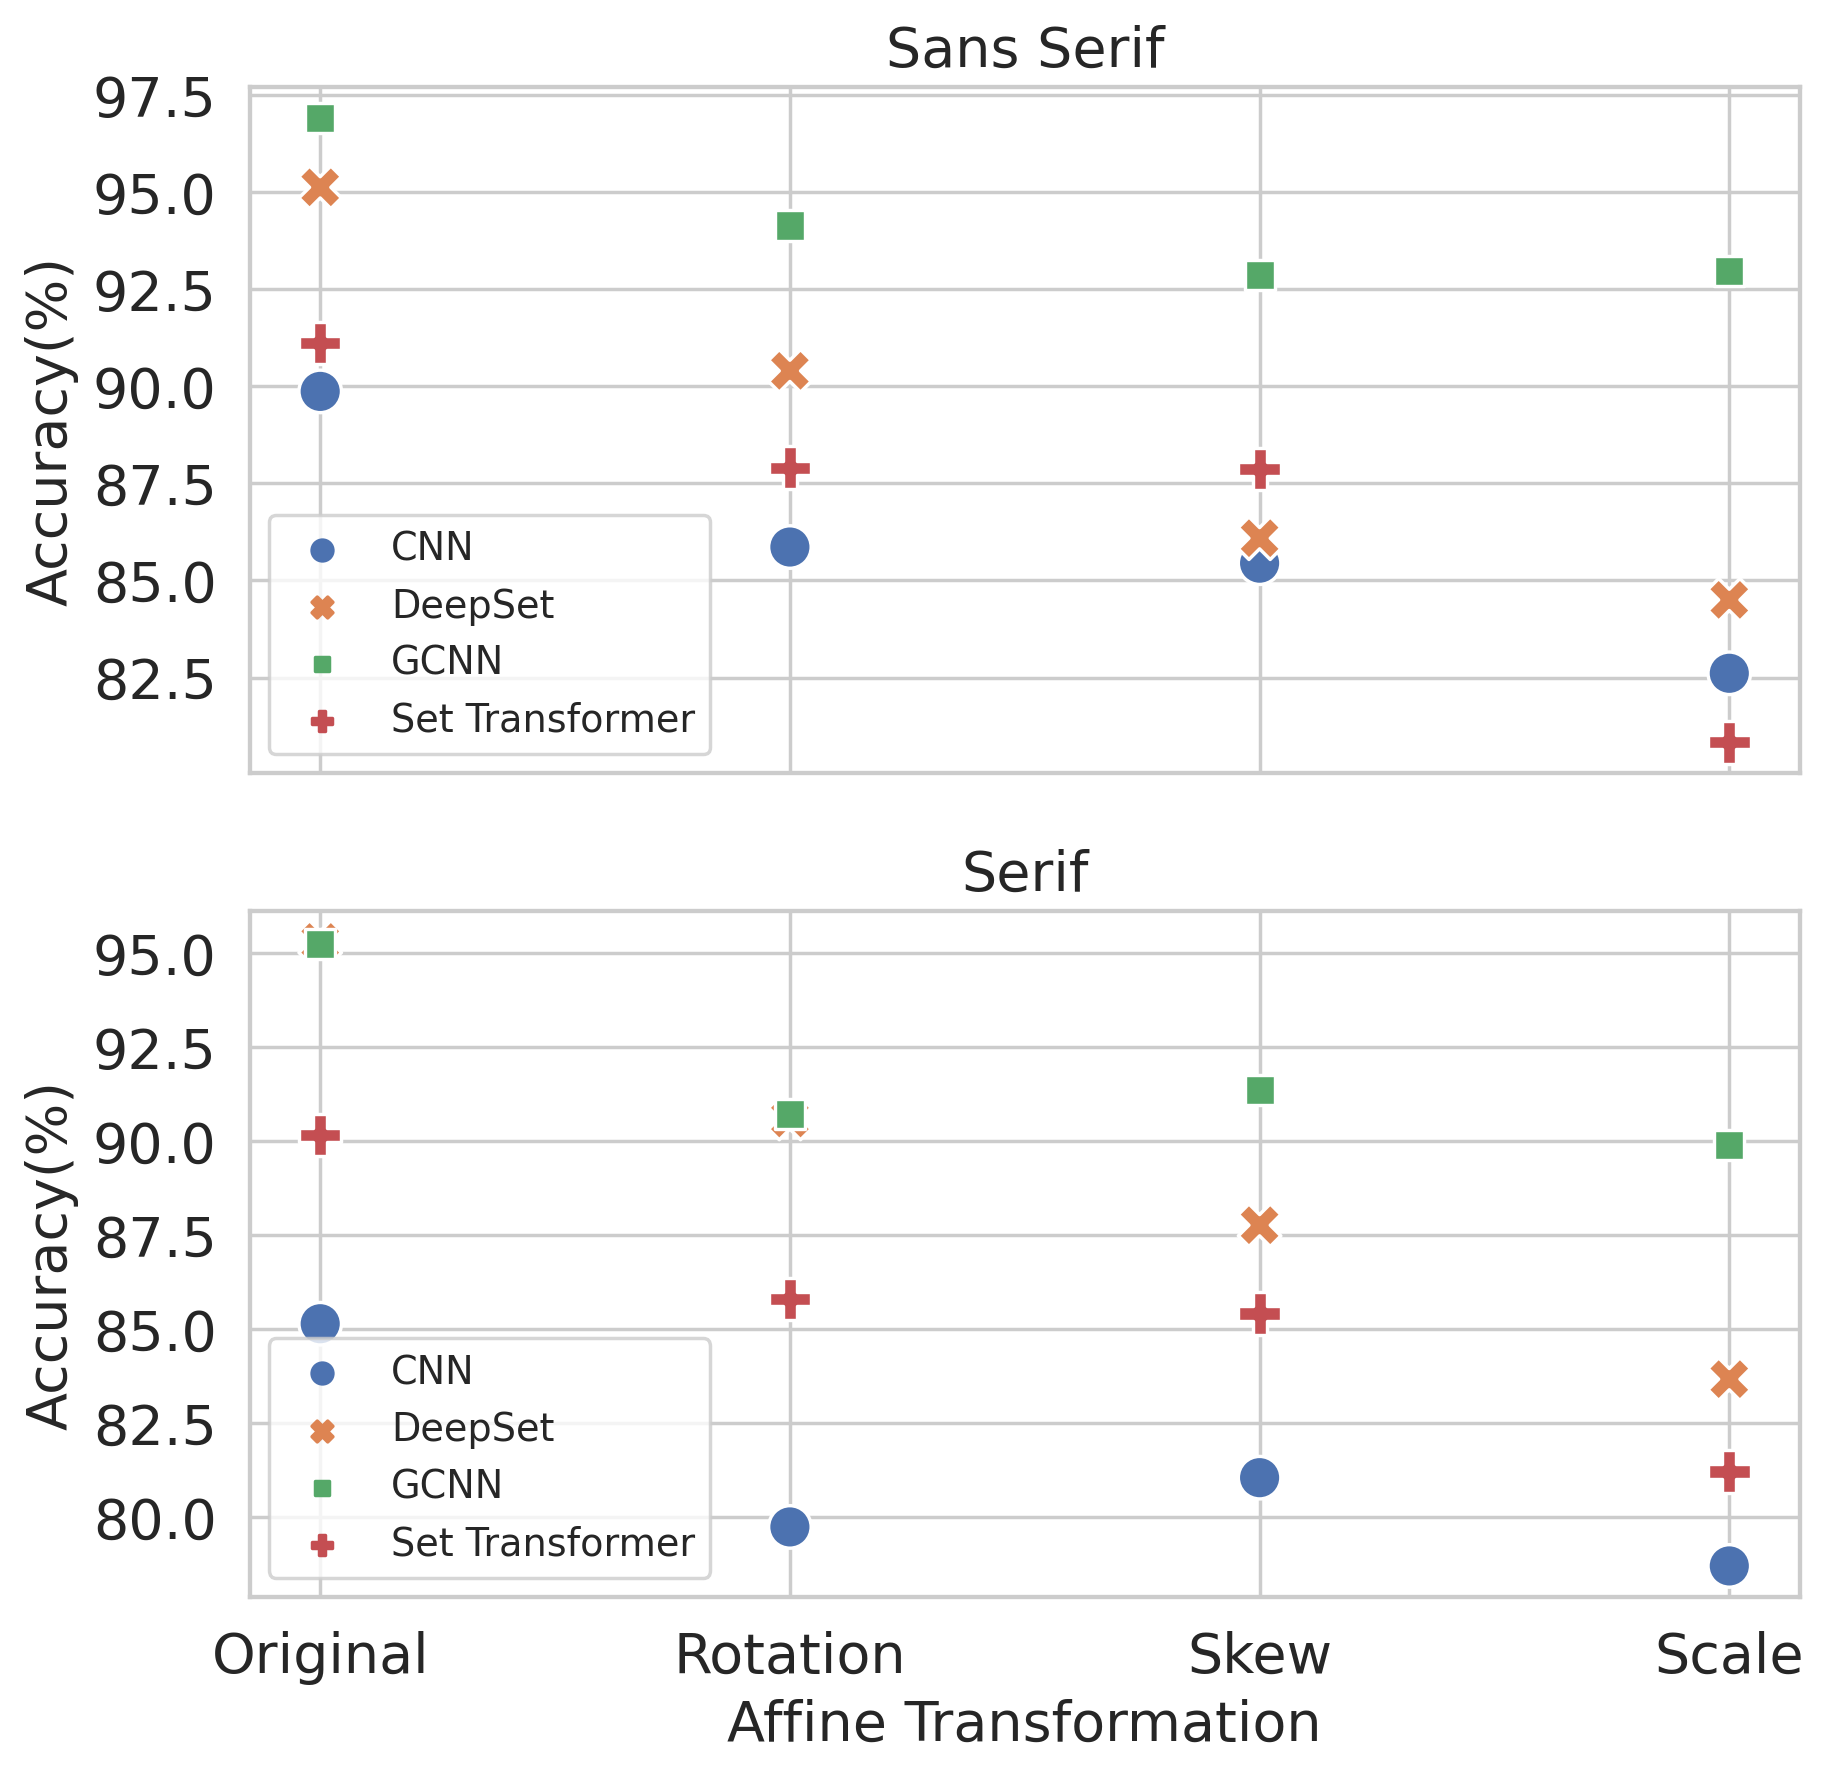

In [23]:
sns.set_theme(style="whitegrid")
fig.tight_layout(pad=0.0, w_pad=0.0, h_pad=0.0)

fig, axs = plt.subplots(2, 1, figsize=(8, 8))

sans_acc_plt = sns.scatterplot(data=sans_acc_df.T, s=150, ax=axs[0])
sans_acc_plt.axes.set_title('Sans Serif', fontsize=font_size, weight=font_weight)
sans_acc_plt.axes.set_ylabel('Accuracy(%)',fontsize=font_size, weight=font_weight)
sans_acc_plt.axes.set_yticklabels(sans_acc_plt.get_yticks(),
                                  fontsize=font_size, 
                                  weight=font_weight)
sans_acc_plt.set(xlabel=None)
sans_acc_plt.set(xticklabels=[])

serif_acc_plt = sns.scatterplot(data=serif_acc_df.T, s=150, ax=axs[1])
serif_acc_plt.axes.set_title('Serif', fontsize=font_size, weight=font_weight)
serif_acc_plt.axes.set_ylabel('Accuracy(%)',fontsize=font_size, weight=font_weight)
serif_acc_plt.axes.set_xlabel('Affine Transformation',fontsize=font_size, weight=font_weight)
serif_acc_plt.axes.set_yticklabels(serif_acc_plt.get_yticks(),
                                   fontsize=font_size, 
                                   weight=font_weight)
serif_acc_plt.axes.set_xticklabels(['Original', 'Rotation', 'Skew', 'Scale'],
                                   fontsize=font_size, 
                                   weight=font_weight)

## Robustness

In [24]:
test_sans_robust_df = np.load(file_path + 'test_sans_serif_robust.pkl', allow_pickle=True)
test_serif_robust_df = np.load(file_path + 'test_serif_robust.pkl', allow_pickle=True)

test_sans_robust = GlyphGeom(data_dir=file_path, dataframe=test_sans_robust_df, transform=ToFixedTensor(1500))
test_serif_robust = GlyphGeom(data_dir=file_path, dataframe=test_serif_robust_df, transform=ToFixedTensor(1500))

In [25]:
test_loader = DataLoader(test_sans_robust, batch_size=64, shuffle=True)

# CNN
model, criterion = build_model('cnn', 'cnn/serif_robust', 8)
sans_cm_cnn, _ = validation(test_loader, model, criterion, 8)

# Deepset
model, criterion = build_model('deepset', 'deepset/serif_robust', 8)
sans_cm_deepset, _ = validation(test_loader, model, criterion, 8)

# GCNN
model, criterion = build_model('gcnn', 'gcnn/serif_robust', 8)
sans_cm_gcnn, _ = validation(test_loader, model, criterion, 8)

# SetTransformer
model, criterion = build_model('transformer', 'transformer/serif_robust', 8)
sans_cm_st, _ = validation(test_loader, model, criterion, 8)

Avg Valid Loss: 1.2195 
Overall Valid Acc: 0.6620 
--------------------------------------------------------------------------------
Avg Valid Loss: 0.7032 
Overall Valid Acc: 0.7604 
--------------------------------------------------------------------------------
Avg Valid Loss: 0.8750 
Overall Valid Acc: 0.7551 
--------------------------------------------------------------------------------
Avg Valid Loss: 0.7143 
Overall Valid Acc: 0.7472 
--------------------------------------------------------------------------------


In [26]:
test_loader = DataLoader(test_serif_robust, batch_size=64, shuffle=True)

# CNN
model, criterion = build_model('cnn', 'cnn/sans_serif_robust', 8)
serif_cm_cnn, _ = validation(test_loader, model, criterion, 8)

# Deepset
model, criterion = build_model('deepset', 'deepset/sans_serif_robust', 8)
serif_cm_deepset, _ = validation(test_loader, model, criterion, 8)

# GCNN
model, criterion = build_model('gcnn', 'gcnn/sans_serif_robust', 8)
serif_cm_gcnn, _ = validation(test_loader, model, criterion, 8)

# SetTransformer
model, criterion = build_model('transformer', 'transformer/sans_serif_robust', 8)
serif_cm_st, _ = validation(test_loader, model, criterion, 8)

Avg Valid Loss: 1.0904 
Overall Valid Acc: 0.6897 
--------------------------------------------------------------------------------
Avg Valid Loss: 0.4934 
Overall Valid Acc: 0.8363 
--------------------------------------------------------------------------------
Avg Valid Loss: 0.4602 
Overall Valid Acc: 0.8449 
--------------------------------------------------------------------------------
Avg Valid Loss: 0.8147 
Overall Valid Acc: 0.7705 
--------------------------------------------------------------------------------


In [27]:
sans_cnn_per_cls = sans_cm_cnn.cm.diag() / sans_cm_cnn.cm.sum(dim=1)
sans_deepset_per_cls = sans_cm_deepset.cm.diag() / sans_cm_deepset.cm.sum(dim=1)
sans_gcnn_per_cls = sans_cm_gcnn.cm.diag() / sans_cm_gcnn.cm.sum(dim=1)
sans_st_per_cls = sans_cm_st.cm.diag() / sans_cm_st.cm.sum(dim=1)

In [28]:
classes = ['0', 'O', '1', 'I', '2', 'Z', '8', 'B']

Text(0.5, 1.0, 'Set Transformer')

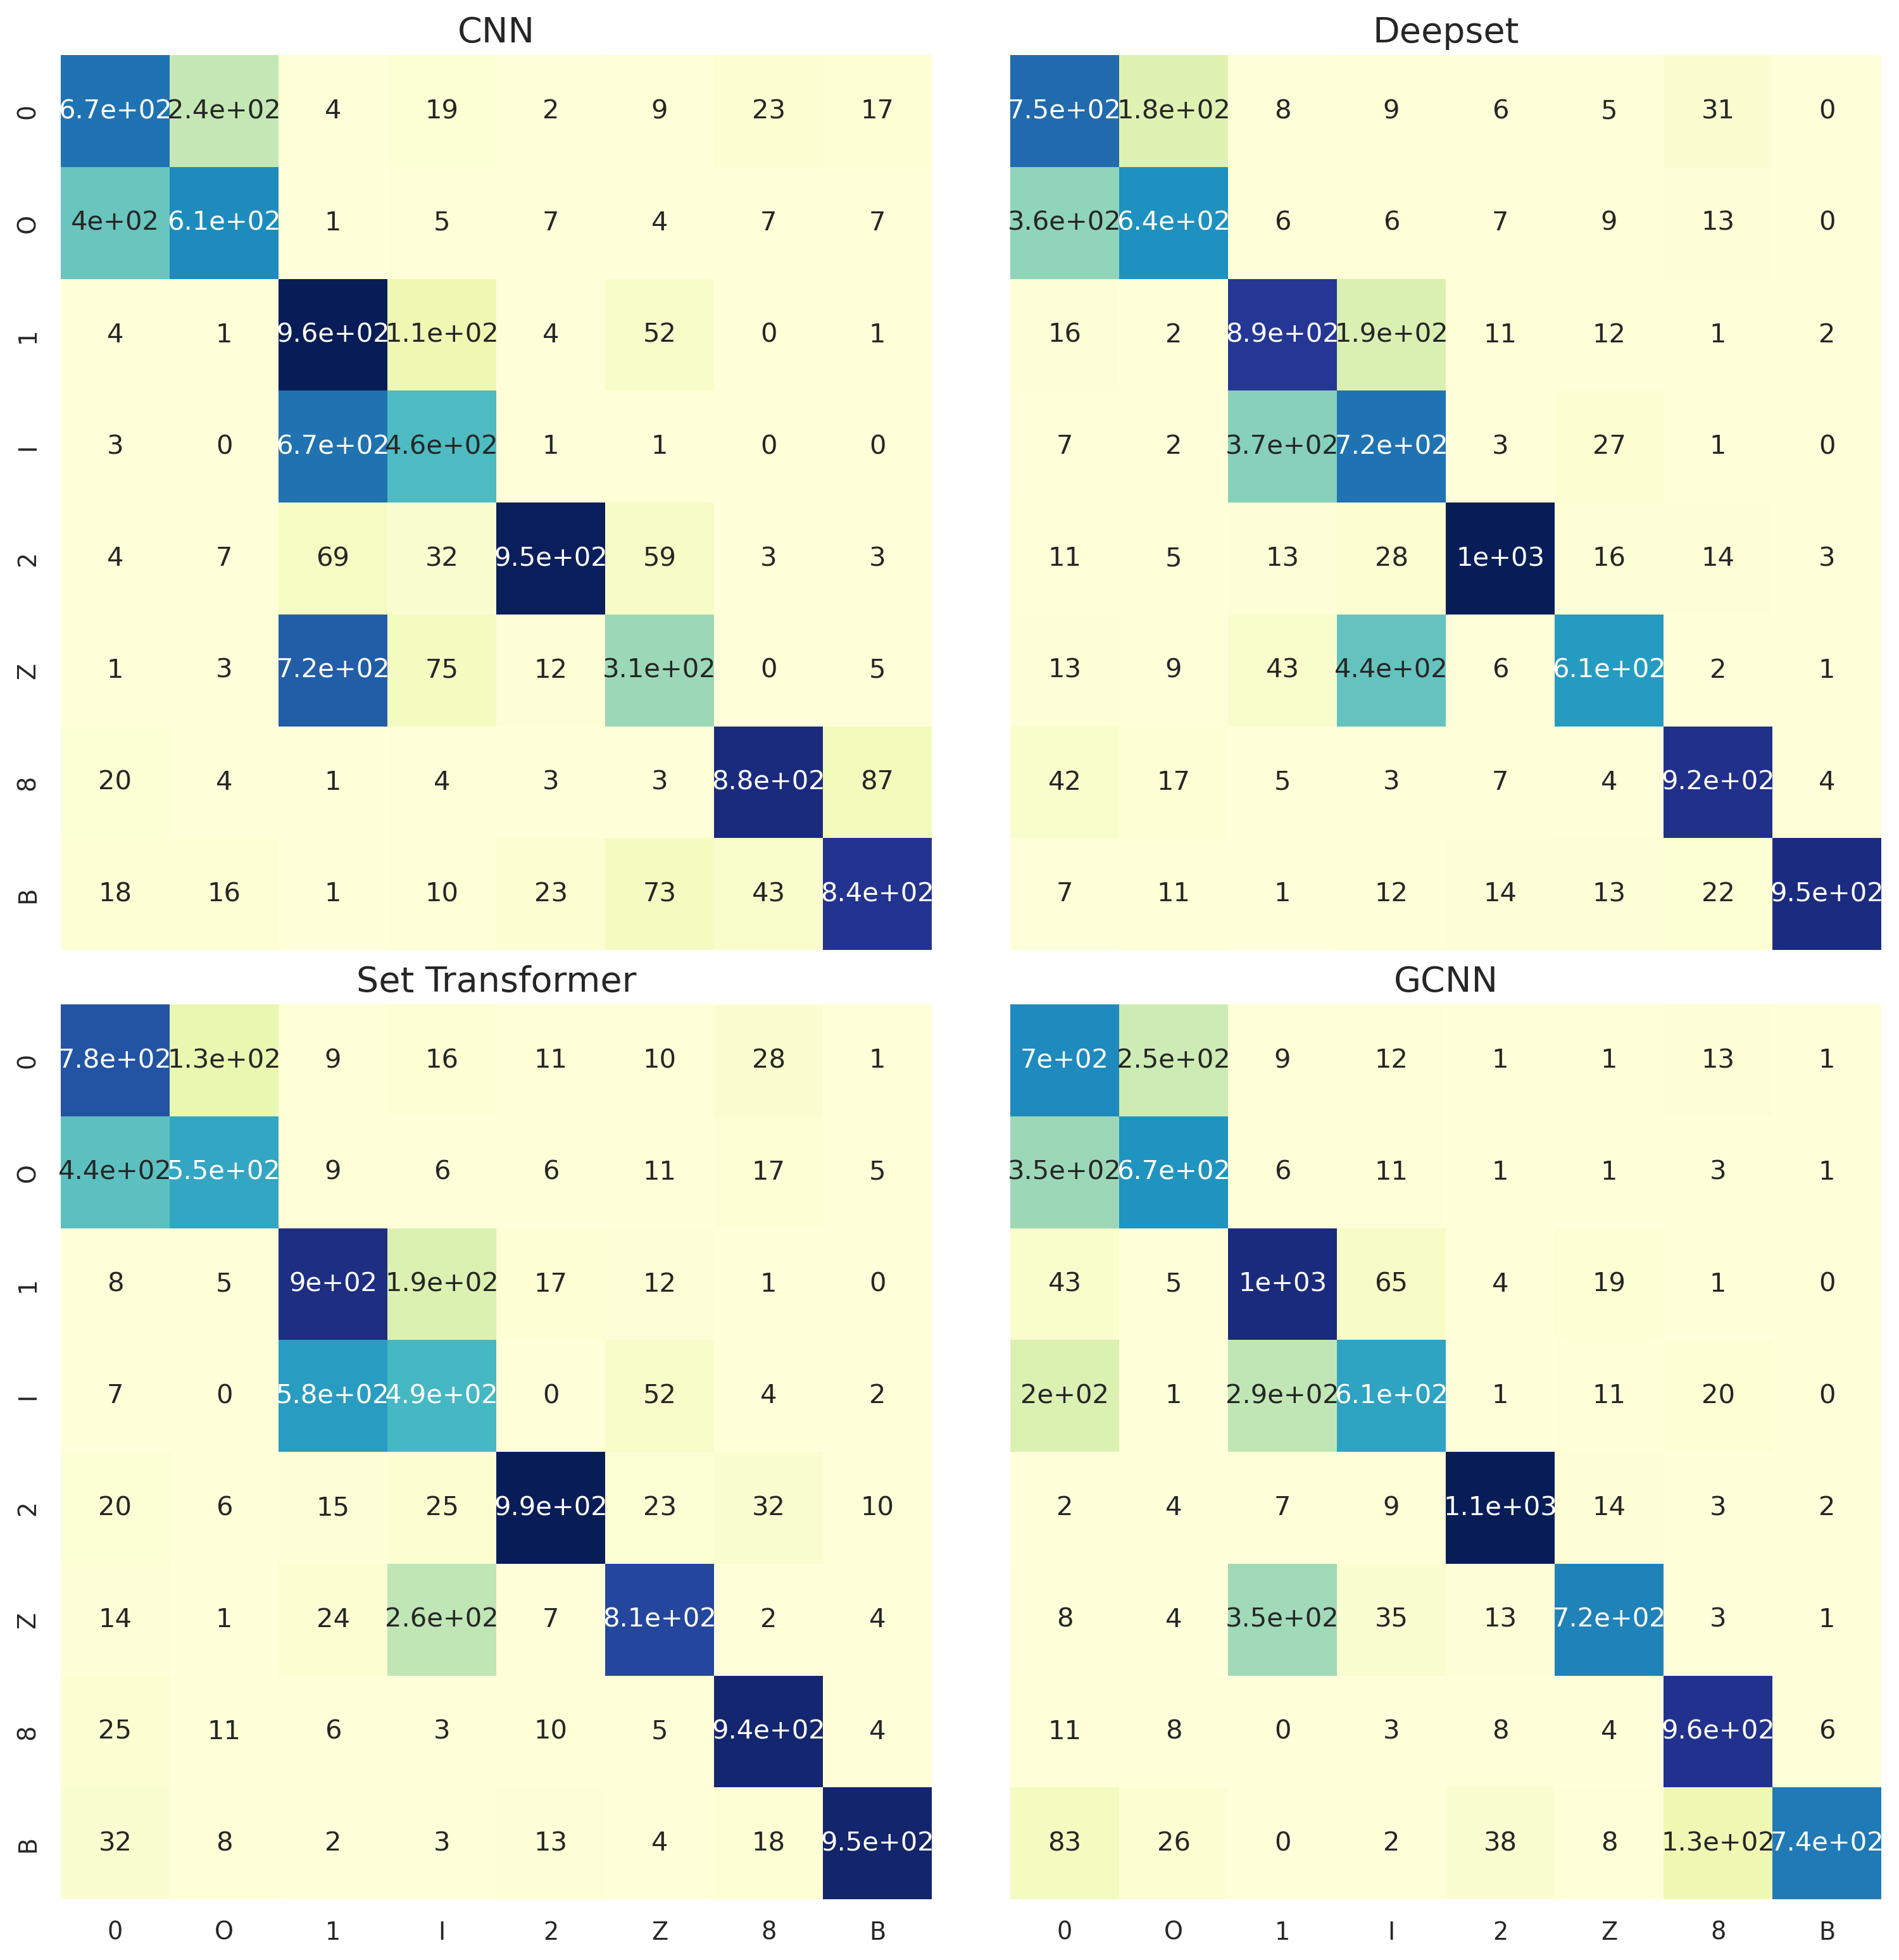

In [29]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12), squeeze=True)
fig.tight_layout(pad=0.0, w_pad=0.0, h_pad=0.0)

plt_1 = sns.heatmap(pd.DataFrame(sans_cm_cnn.cm, 
                    index = [i for i in classes], 
                    columns = [i for i in classes]), annot=True, cmap="YlGnBu", ax=axs[0,0], cbar=False)
plt_1.set(xticklabels=[])
plt_1.axes.set_title('CNN', fontsize=font_size, weight=font_weight)

plt_2 = sns.heatmap(pd.DataFrame(sans_cm_deepset.cm, 
                         index = [i for i in classes], 
                         columns = [i for i in classes]), annot=True, cmap="YlGnBu", ax=axs[0,1], cbar=False)
plt_2.set(xticklabels=[])
plt_2.set(yticklabels=[])
plt_2.axes.set_title('Deepset', fontsize=font_size, weight=font_weight)

plt_3 = sns.heatmap(pd.DataFrame(sans_cm_gcnn.cm, 
                         index = [i for i in classes], 
                         columns = [i for i in classes]), annot=True, cmap="YlGnBu", ax=axs[1,1], cbar=False)
plt_3.set(yticklabels=[])
plt_3.axes.set_title('GCNN', fontsize=font_size, weight=font_weight)

plt_4 = sns.heatmap(pd.DataFrame(sans_cm_st.cm, 
                         index = [i for i in classes], 
                         columns = [i for i in classes]), annot=True, cmap="YlGnBu", ax=axs[1,0], cbar=False)
plt_4.axes.set_title('Set Transformer', fontsize=font_size, weight=font_weight)

In [30]:
serif_cnn_per_cls = serif_cm_cnn.cm.diag() / serif_cm_cnn.cm.sum(dim=1)
serif_deepset_per_cls = serif_cm_deepset.cm.diag() / serif_cm_deepset.cm.sum(dim=1)
serif_gcnn_per_cls = serif_cm_gcnn.cm.diag() / serif_cm_gcnn.cm.sum(dim=1)
serif_st_per_cls = serif_cm_st.cm.diag() / serif_cm_st.cm.sum(dim=1)

Text(0.5, 1.0, 'Set Transformer')

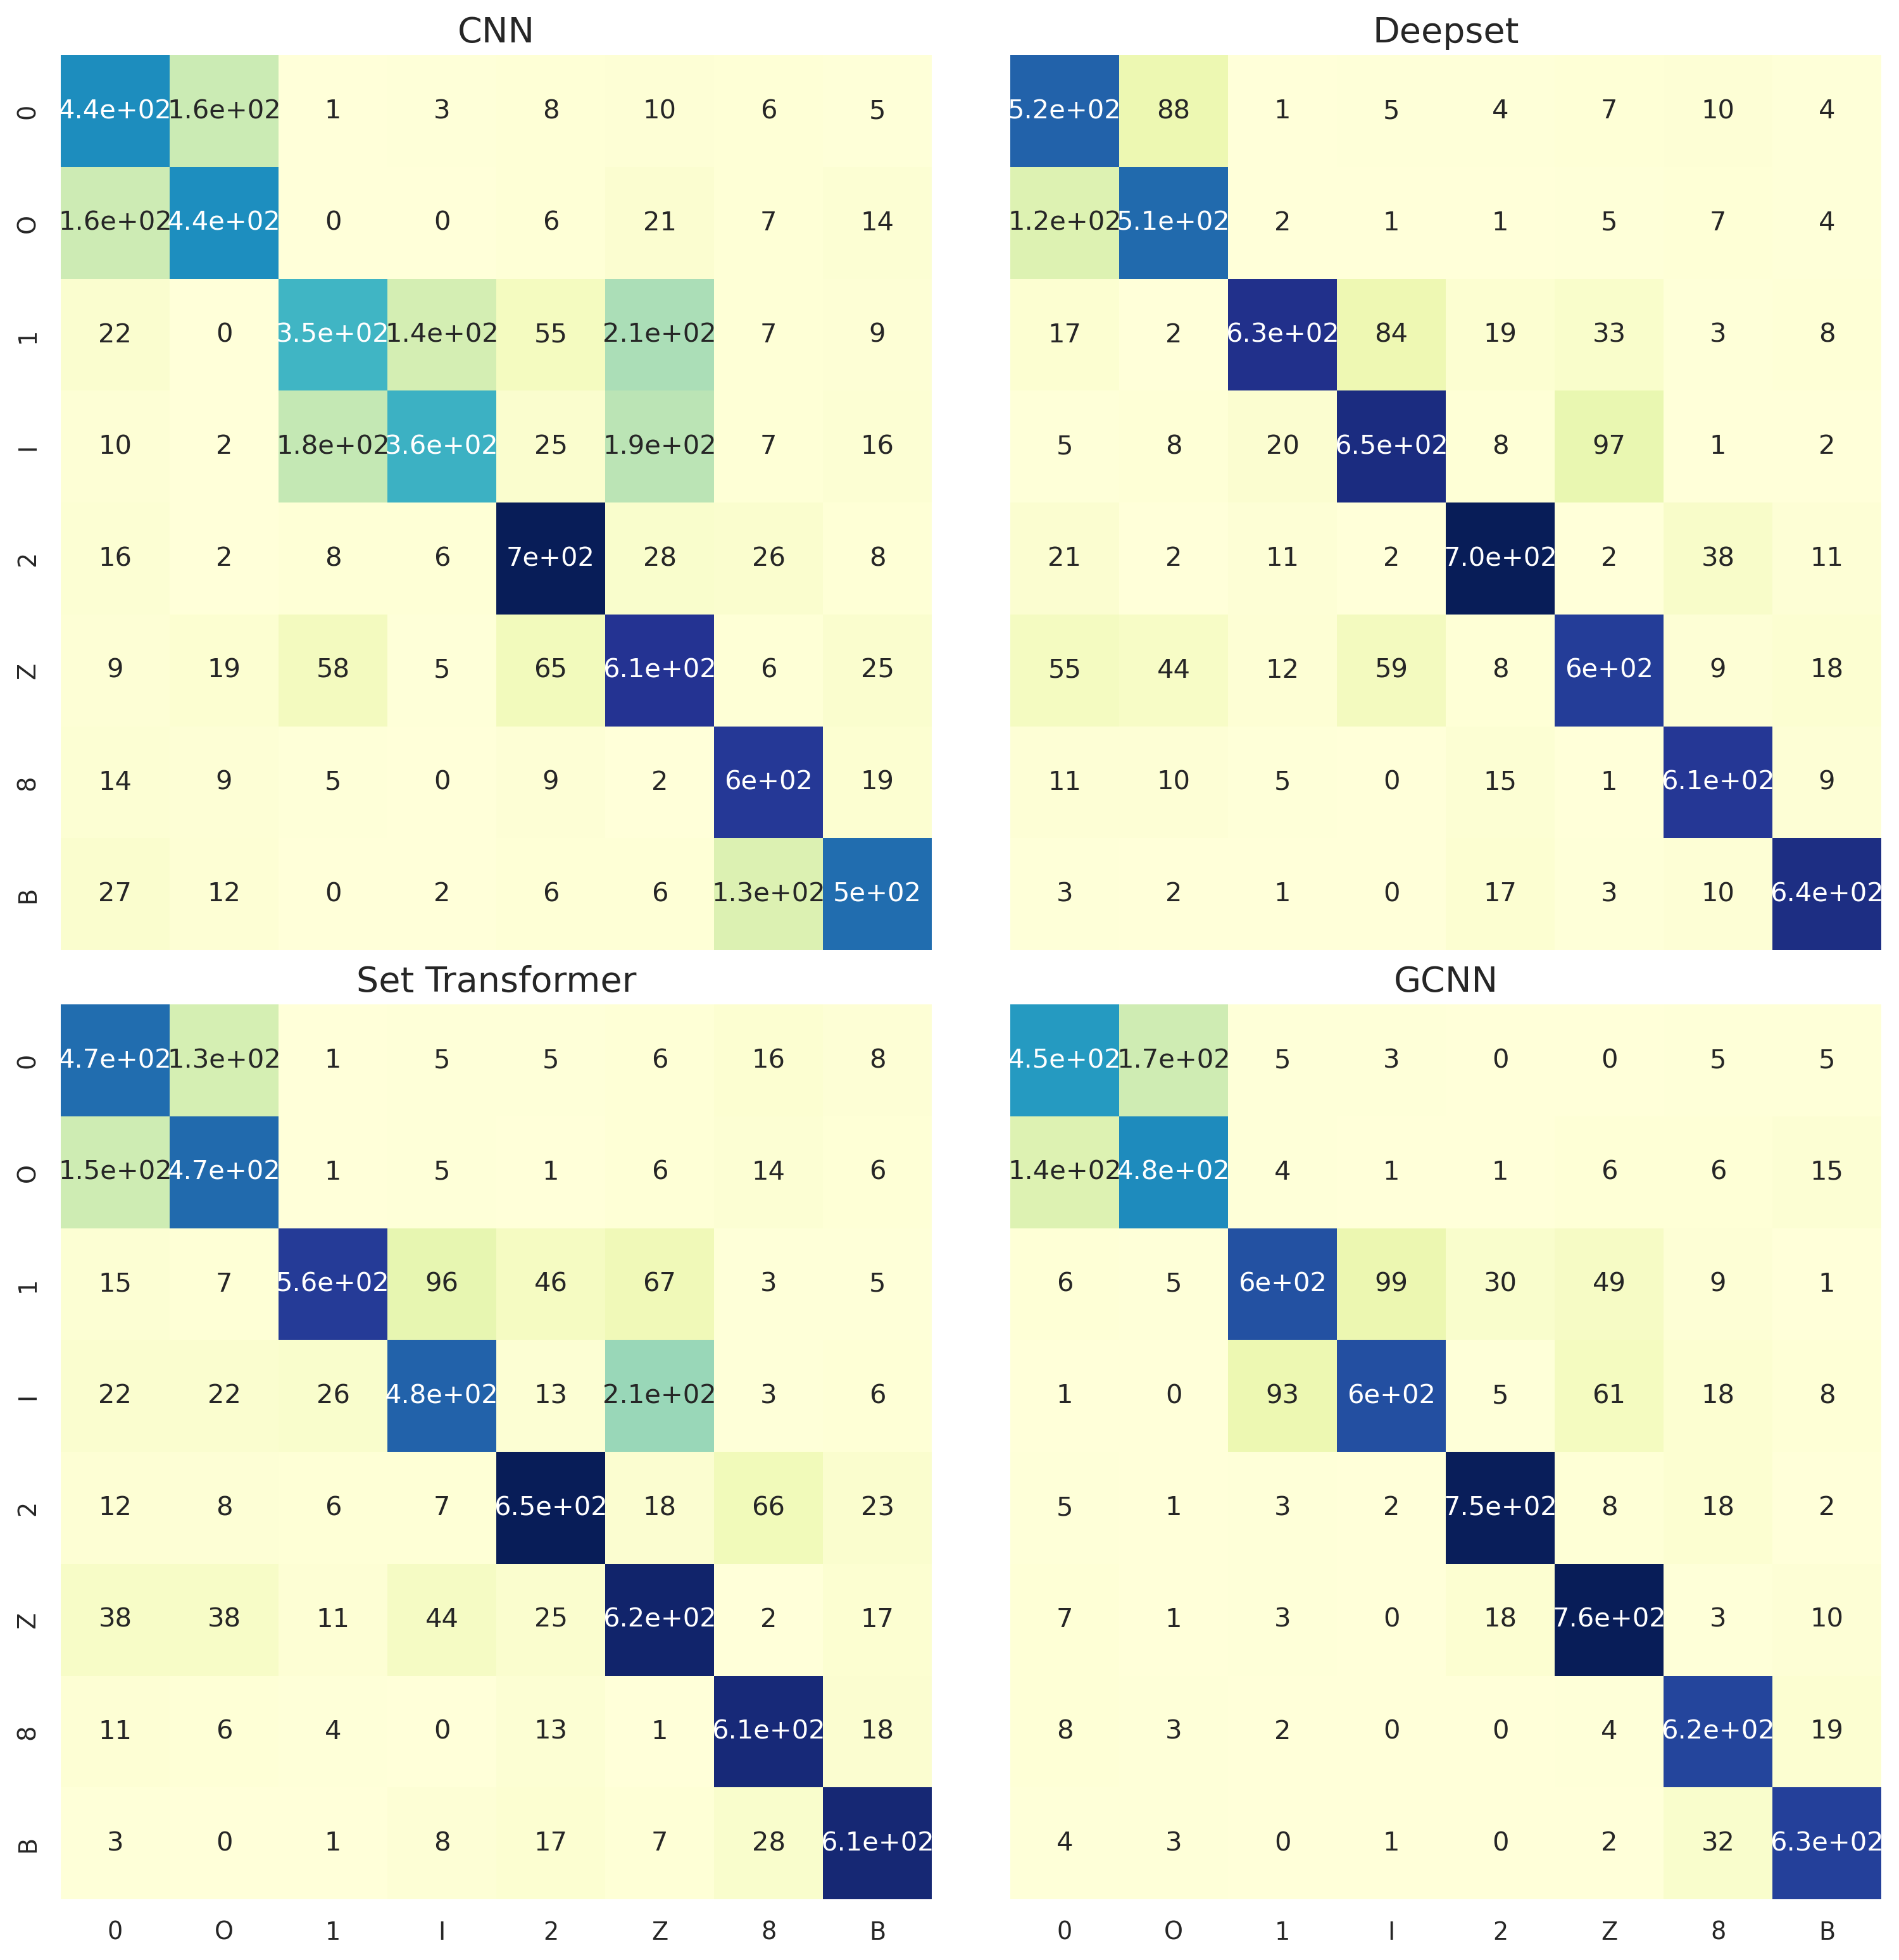

In [31]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12), squeeze=True)
fig.tight_layout(pad=0.0, w_pad=0.0, h_pad=0.0)

plt_1 = sns.heatmap(pd.DataFrame(serif_cm_cnn.cm, 
                    index = [i for i in classes], 
                    columns = [i for i in classes]), annot=True, cmap="YlGnBu", ax=axs[0,0], cbar=False)
plt_1.set(xticklabels=[])
plt_1.axes.set_title('CNN', fontsize=font_size, weight=font_weight)

plt_2 = sns.heatmap(pd.DataFrame(serif_cm_deepset.cm, 
                         index = [i for i in classes], 
                         columns = [i for i in classes]), annot=True, cmap="YlGnBu", ax=axs[0,1], cbar=False)
plt_2.set(xticklabels=[])
plt_2.set(yticklabels=[])
plt_2.axes.set_title('Deepset', fontsize=font_size, weight=font_weight)

plt_3 = sns.heatmap(pd.DataFrame(serif_cm_gcnn.cm, 
                         index = [i for i in classes], 
                         columns = [i for i in classes]), annot=True, cmap="YlGnBu", ax=axs[1,1], cbar=False)
plt_3.set(yticklabels=[])
plt_3.axes.set_title('GCNN', fontsize=font_size, weight=font_weight)

plt_4 = sns.heatmap(pd.DataFrame(serif_cm_st.cm, 
                         index = [i for i in classes], 
                         columns = [i for i in classes]), annot=True, cmap="YlGnBu", ax=axs[1,0], cbar=False)
plt_4.axes.set_title('Set Transformer', fontsize=font_size, weight=font_weight)

In [32]:
sans_per_cls_acc = {
       '0': {'CNN':sans_cnn_per_cls.numpy()[0] * 100, 
            'DeepSet':sans_deepset_per_cls.numpy()[0] * 100, 
            'GCNN':sans_gcnn_per_cls.numpy()[0] * 100, 
            'Set Transformer':sans_st_per_cls.numpy()[0] * 100},
       
       'O': {'CNN':sans_cnn_per_cls.numpy()[1] * 100, 
            'DeepSet':sans_deepset_per_cls.numpy()[1] * 100, 
            'GCNN':sans_gcnn_per_cls.numpy()[1] * 100, 
            'Set Transformer':sans_st_per_cls.numpy()[1] * 100}, 
       
       '1': {'CNN':sans_cnn_per_cls.numpy()[2] * 100, 
            'DeepSet':sans_deepset_per_cls.numpy()[2] * 100, 
            'GCNN':sans_gcnn_per_cls.numpy()[2] * 100, 
            'Set Transformer':sans_st_per_cls.numpy()[2] * 100}, 
       
       'I': {'CNN':sans_cnn_per_cls.numpy()[3] * 100, 
            'DeepSet':sans_deepset_per_cls.numpy()[3] * 100, 
            'GCNN':sans_gcnn_per_cls.numpy()[3] * 100, 
            'Set Transformer':sans_st_per_cls.numpy()[3] * 100},
              
       '2': {'CNN':sans_cnn_per_cls.numpy()[4] * 100, 
            'DeepSet':sans_deepset_per_cls.numpy()[4] * 100, 
            'GCNN':sans_gcnn_per_cls.numpy()[4] * 100, 
            'Set Transformer':sans_st_per_cls.numpy()[4] * 100},
    
       'Z': {'CNN':sans_cnn_per_cls.numpy()[5] * 100, 
            'DeepSet':sans_deepset_per_cls.numpy()[5] * 100, 
            'GCNN':sans_gcnn_per_cls.numpy()[5] * 100, 
            'Set Transformer':sans_st_per_cls.numpy()[5] * 100},
              
       '8': {'CNN':sans_cnn_per_cls.numpy()[6] * 100, 
            'DeepSet':sans_deepset_per_cls.numpy()[6] * 100, 
            'GCNN':sans_gcnn_per_cls.numpy()[6] * 100, 
            'Set Transformer':sans_st_per_cls.numpy()[6] * 100},
              
       'B': {'CNN':sans_cnn_per_cls.numpy()[7] * 100, 
            'DeepSet':sans_deepset_per_cls.numpy()[7] * 100, 
            'GCNN':sans_gcnn_per_cls.numpy()[7] * 100, 
            'Set Transformer':sans_st_per_cls.numpy()[7] * 100}
       }

sans_per_cls_df = pd.DataFrame.from_dict(sans_per_cls_acc)

In [33]:
serif_per_cls_acc = {
       '0': {'CNN':serif_cnn_per_cls.numpy()[0] * 100, 
            'DeepSet':serif_deepset_per_cls.numpy()[0] * 100, 
            'GCNN':serif_gcnn_per_cls.numpy()[0] * 100, 
            'Set Transformer':serif_st_per_cls.numpy()[0] * 100},
       
       'O': {'CNN':serif_cnn_per_cls.numpy()[1] * 100, 
            'DeepSet':serif_deepset_per_cls.numpy()[1] * 100, 
            'GCNN':serif_gcnn_per_cls.numpy()[1] * 100, 
            'Set Transformer':serif_st_per_cls.numpy()[1] * 100}, 
       
       '1': {'CNN':serif_cnn_per_cls.numpy()[2] * 100, 
            'DeepSet':serif_deepset_per_cls.numpy()[2] * 100, 
            'GCNN':serif_gcnn_per_cls.numpy()[2] * 100, 
            'Set Transformer':serif_st_per_cls.numpy()[2] * 100}, 
       
       'I': {'CNN':serif_cnn_per_cls.numpy()[3] * 100, 
            'DeepSet':serif_deepset_per_cls.numpy()[3] * 100, 
            'GCNN':serif_gcnn_per_cls.numpy()[3] * 100, 
            'Set Transformer':serif_st_per_cls.numpy()[3] * 100},
              
       '2': {'CNN':serif_cnn_per_cls.numpy()[4] * 100, 
            'DeepSet':serif_deepset_per_cls.numpy()[4] * 100, 
            'GCNN':serif_gcnn_per_cls.numpy()[4] * 100, 
            'Set Transformer':serif_st_per_cls.numpy()[4] * 100},
    
       'Z': {'CNN':serif_cnn_per_cls.numpy()[5] * 100, 
            'DeepSet':serif_deepset_per_cls.numpy()[5] * 100, 
            'GCNN':serif_gcnn_per_cls.numpy()[5] * 100, 
            'Set Transformer':serif_st_per_cls.numpy()[5] * 100},
              
       '8': {'CNN':serif_cnn_per_cls.numpy()[6] * 100, 
            'DeepSet':serif_deepset_per_cls.numpy()[6] * 100, 
            'GCNN':serif_gcnn_per_cls.numpy()[6] * 100, 
            'Set Transformer':serif_st_per_cls.numpy()[6] * 100},
              
       'B': {'CNN':serif_cnn_per_cls.numpy()[7] * 100, 
            'DeepSet':serif_deepset_per_cls.numpy()[7] * 100, 
            'GCNN':serif_gcnn_per_cls.numpy()[7] * 100, 
            'Set Transformer':serif_st_per_cls.numpy()[7] * 100}
       }

serif_per_cls_df = pd.DataFrame.from_dict(serif_per_cls_acc)

/tmp/ipykernel_389410/3717238379.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  sans_acc_plt.axes.set_yticklabels(sans_acc_plt.get_yticks(),
/tmp/ipykernel_389410/3717238379.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  serif_acc_plt.axes.set_yticklabels(serif_acc_plt.get_yticks(),
/tmp/ipykernel_389410/3717238379.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  serif_acc_plt.axes.set_xticklabels(['0', 'O', '1', 'I', '2', 'Z', '8', 'B'],


[Text(0, 0, '0'),
 Text(1, 0, 'O'),
 Text(2, 0, '1'),
 Text(3, 0, 'I'),
 Text(4, 0, '2'),
 Text(5, 0, 'Z'),
 Text(6, 0, '8'),
 Text(7, 0, 'B')]

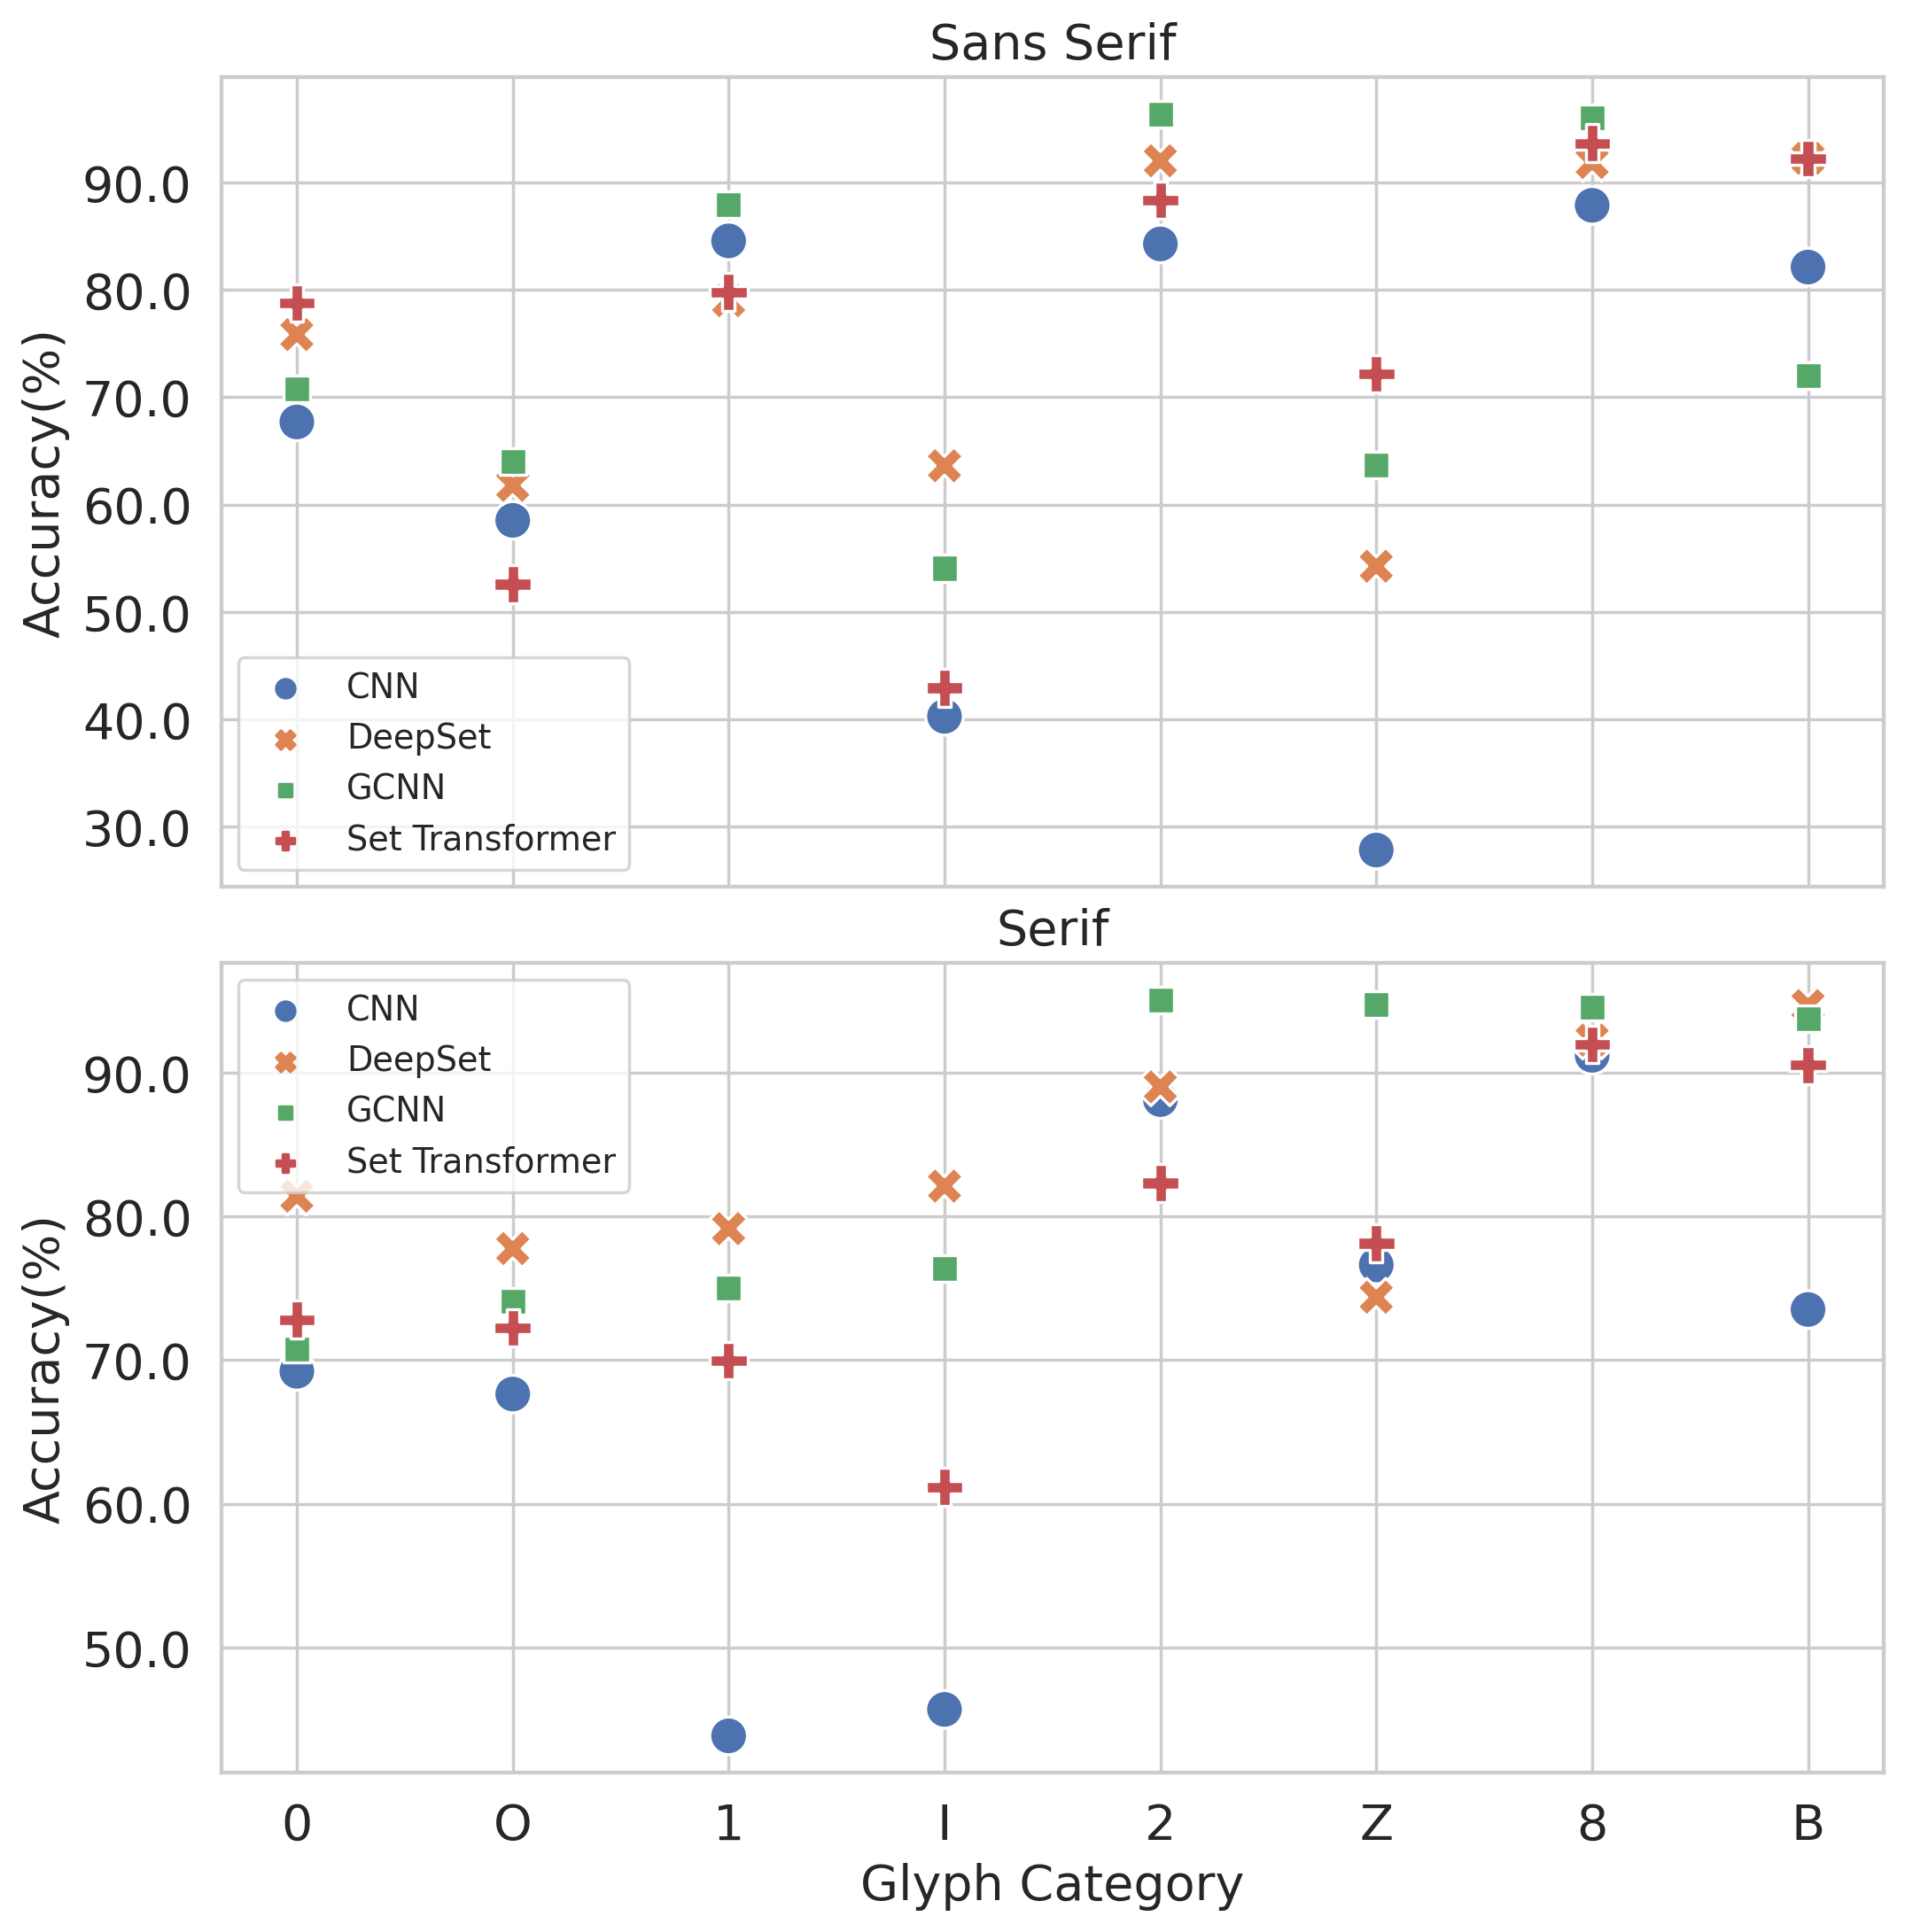

In [34]:
fig, axs = plt.subplots(2, 1, figsize=(8, 8))
fig.tight_layout(pad=0.0, w_pad=0.0, h_pad=0.0)

sans_acc_plt = sns.scatterplot(data=sans_per_cls_df.T, s=150, ax=axs[0])
sans_acc_plt.axes.set_title('Sans Serif', fontsize=font_size, weight=font_weight)
sans_acc_plt.axes.set_ylabel('Accuracy(%)',fontsize=font_size, weight=font_weight)
sans_acc_plt.axes.set_yticklabels(sans_acc_plt.get_yticks(),
                                  fontsize=font_size, 
                                  weight=font_weight)
sans_acc_plt.set(xlabel=None)
sans_acc_plt.set(xticklabels=[])

serif_acc_plt = sns.scatterplot(data=serif_per_cls_df.T, s=150, ax=axs[1])
serif_acc_plt.axes.set_title('Serif', fontsize=font_size, weight=font_weight)
serif_acc_plt.axes.set_ylabel('Accuracy(%)',fontsize=font_size, weight=font_weight)
serif_acc_plt.axes.set_xlabel('Glyph Category',fontsize=font_size, weight=font_weight)
serif_acc_plt.axes.set_yticklabels(serif_acc_plt.get_yticks(),
                                   fontsize=font_size, 
                                   weight=font_weight)
serif_acc_plt.axes.set_xticklabels(['0', 'O', '1', 'I', '2', 'Z', '8', 'B'],
                                   fontsize=font_size, 
                                   weight=font_weight)

In [35]:
test_serif = GlyphGeom(data_dir=file_path, dataframe=test_serif_df, transform=ToFixedTensor(1500))

In [36]:
activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

Text(0.5, 290.12499999999966, 'Pred.: 5')

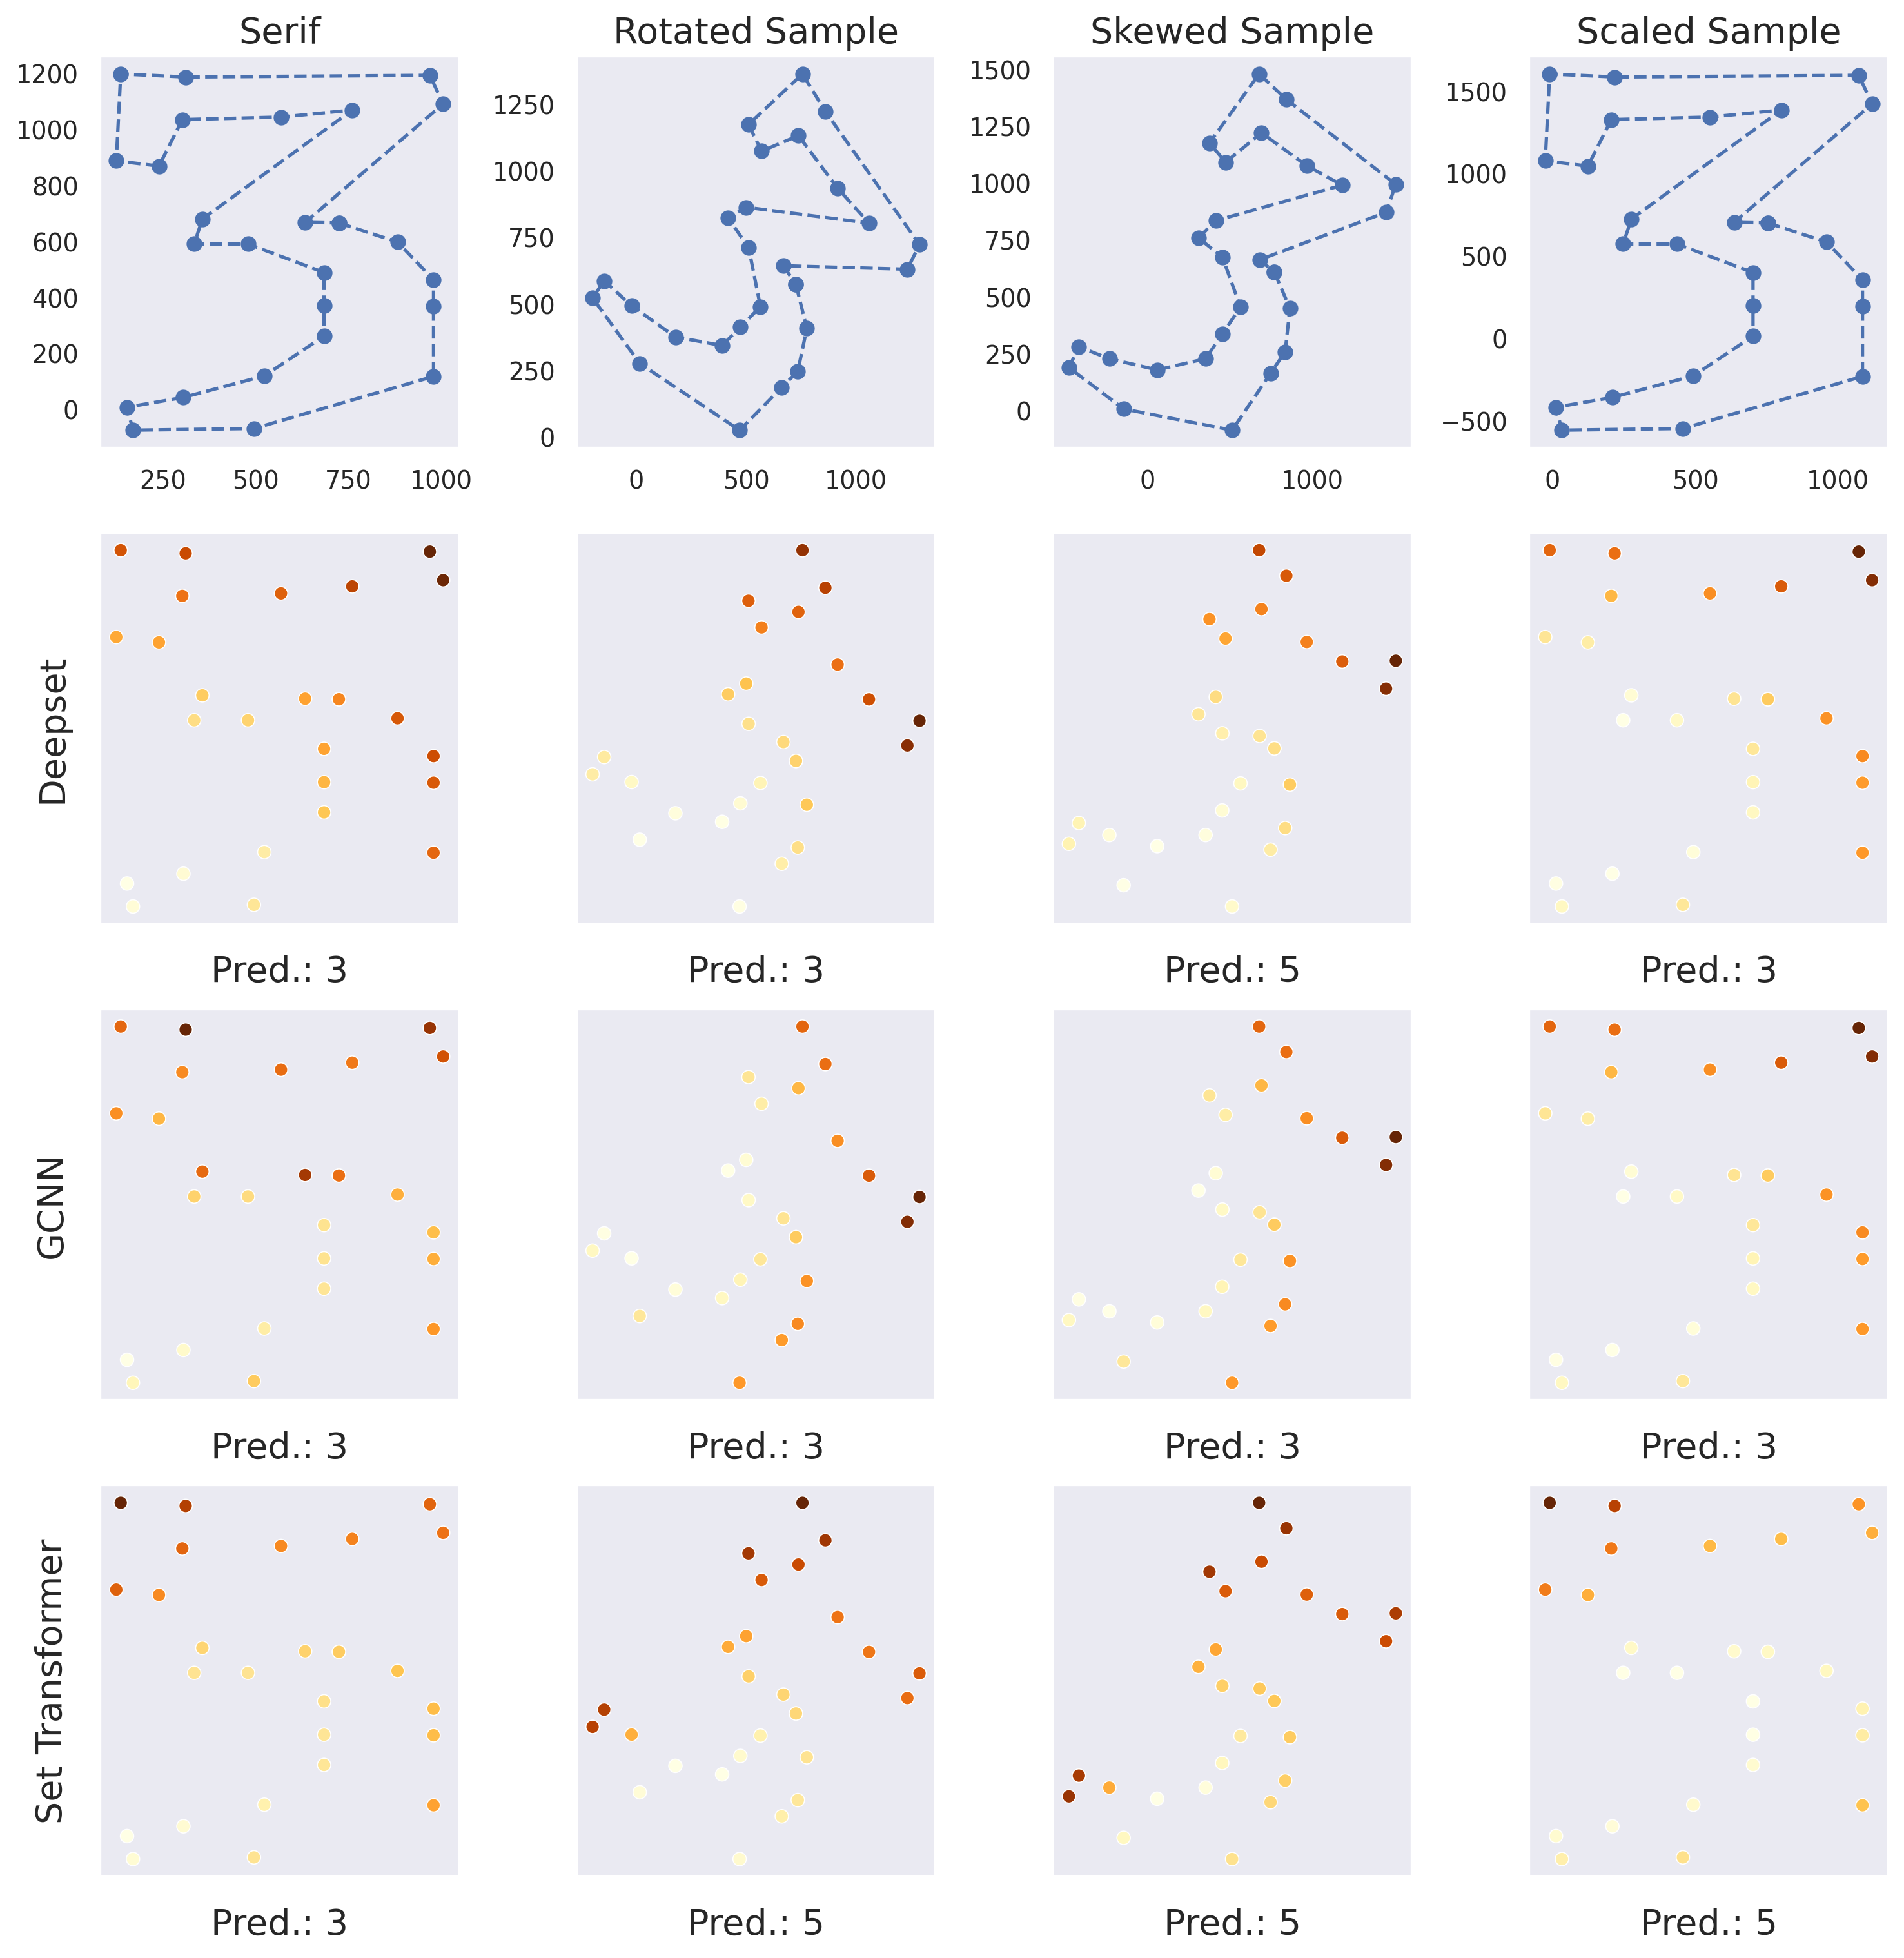

In [37]:
sample_id = 624

sns.set_theme(style="dark")

fig, axs = plt.subplots(4, 4, figsize=(12, 12))
fig.tight_layout()

geom_o = np.asarray(test_serif_df['geom'][sample_id].exterior.xy)
geom_len = geom_o.shape[1]
axs[0,0].plot(geom_o[0,:],geom_o[1,:], marker='o', linestyle='dashed')
axs[0,0].set_title('Serif', fontsize=font_size, weight=font_weight)

geom_r = np.asarray(test_serif_df['geom'][sample_id+1].exterior.xy)
axs[0,1].plot(geom_r[0,:],geom_r[1,:], marker='o', linestyle='dashed')
axs[0,1].set_title('Rotated Sample', fontsize=font_size, weight=font_weight)

geom_d = np.asarray(test_serif_df['geom'][sample_id+2].exterior.xy)
axs[0,2].plot(geom_d[0,:],geom_d[1,:], marker='o', linestyle='dashed')
axs[0,2].set_title('Skewed Sample', fontsize=font_size, weight=font_weight)

geom_s = np.asarray(test_serif_df['geom'][sample_id+3].exterior.xy)
axs[0,3].plot(geom_s[0,:],geom_s[1,:], marker='o', linestyle='dashed')
axs[0,3].set_title('Scaled Sample', fontsize=font_size, weight=font_weight)

# # Deepset
model, criterion = build_model('deepset', 'deepset/sans_serif')
model.eval()
model.equi_layer3.register_forward_hook(get_activation('equi_layer3'))

pred = model(test_serif[sample_id]['geom'].unsqueeze(0).to(device))
feat = activation['equi_layer3'].mean(1).squeeze().cpu().detach().numpy()
feat_df = pd.DataFrame({'x':geom_o[0,:], 'y':geom_o[1,:], 'z':feat[0:geom_len]})
deepset_plot_o = sns.scatterplot(data=feat_df, x='x', y='y', hue='z', palette="YlOrBr", markers='-o', legend=False, ax=axs[1,0])
deepset_plot_o.set(xticklabels=[])
deepset_plot_o.set(yticklabels=[])
deepset_plot_o.set(xlabel=None)
deepset_plot_o.axes.set_xlabel(f'Pred.: {pred.argmax()}', fontsize=font_size, weight=font_weight)
deepset_plot_o.axes.set_ylabel('Deepset', fontsize=font_size, weight=font_weight)

pred = model(test_serif[sample_id+1]['geom'].unsqueeze(0).to(device))
feat = activation['equi_layer3'].mean(1).squeeze().cpu().detach().numpy()
feat_df = pd.DataFrame({'x':geom_r[0,:], 'y':geom_r[1,:], 'z':feat[0:geom_len]})
deepset_plot_r = sns.scatterplot(data=feat_df, x='x', y='y', hue='z', palette="YlOrBr", markers='-o', legend=False, ax=axs[1,1])
deepset_plot_r.set(xticklabels=[])
deepset_plot_r.set(yticklabels=[])
deepset_plot_r.set(xlabel=None)
deepset_plot_r.set(ylabel=None)
deepset_plot_r.axes.set_xlabel(f'Pred.: {pred.argmax()}', fontsize=font_size, weight=font_weight)

pred = model(test_serif[sample_id+2]['geom'].unsqueeze(0).to(device))
feat = activation['equi_layer3'].mean(1).squeeze().cpu().detach().numpy()
feat_df = pd.DataFrame({'x':geom_d[0,:], 'y':geom_d[1,:], 'z':feat[0:geom_len]})
deepset_plot_d = sns.scatterplot(data=feat_df, x='x', y='y', hue='z', palette="YlOrBr", markers='-o', legend=False, ax=axs[1,2])
deepset_plot_d.set(xticklabels=[])
deepset_plot_d.set(yticklabels=[])
deepset_plot_d.set(xlabel=None)
deepset_plot_d.set(ylabel=None)
deepset_plot_d.axes.set_xlabel(f'Pred.: {pred.argmax()}', fontsize=font_size, weight=font_weight)

pred = model(test_serif[sample_id+3]['geom'].unsqueeze(0).to(device))
feat = activation['equi_layer3'].mean(1).squeeze().cpu().detach().numpy()
feat_df = pd.DataFrame({'x':geom_s[0,:], 'y':geom_s[1,:], 'z':feat[0:geom_len]})
deepset_plot_s = sns.scatterplot(data=feat_df, x='x', y='y', hue='z', palette="YlOrBr", markers='-o', legend=False, ax=axs[1,3])
deepset_plot_s.set(xticklabels=[])
deepset_plot_s.set(yticklabels=[])
deepset_plot_s.set(xlabel=None)
deepset_plot_s.set(ylabel=None)
deepset_plot_s.axes.set_xlabel(f'Pred.: {pred.argmax()}', fontsize=font_size, weight=font_weight)

# GCNN
model, criterion = build_model('gcnn', 'gcnn/sans_serif')
model.eval()
model.conv3.register_forward_hook(get_activation('conv3'))

pred = model(test_serif[sample_id]['geom'].unsqueeze(0).to(device))
feat = activation['conv3'].mean(1).squeeze().cpu().detach().numpy()
feat_df = pd.DataFrame({'x':geom_o[0,:], 'y':geom_o[1,:], 'z':feat[0:geom_len]})
gcnn_plot_o = sns.scatterplot(data=feat_df, x='x', y='y', hue='z', palette="YlOrBr", markers='-o', legend=False, ax=axs[2,0])
gcnn_plot_o.set(xticklabels=[])
gcnn_plot_o.set(yticklabels=[])
gcnn_plot_o.set(xlabel=None)
gcnn_plot_o.set(ylabel=None)
gcnn_plot_o.axes.set_xlabel(f'Pred.: {pred.argmax()}', fontsize=font_size, weight=font_weight)
gcnn_plot_o.axes.set_ylabel('GCNN',fontsize=font_size, weight=font_weight)

pred = model(test_serif[sample_id+1]['geom'].unsqueeze(0).to(device))
feat = activation['equi_layer3'].mean(1).squeeze().cpu().detach().numpy()
feat_df = pd.DataFrame({'x':geom_r[0,:], 'y':geom_r[1,:], 'z':feat[0:geom_len]})
gcnn_plot_r = sns.scatterplot(data=feat_df, x='x', y='y', hue='z', palette="YlOrBr", markers='-o', legend=False, ax=axs[2,1])
gcnn_plot_r.set(xticklabels=[])
gcnn_plot_r.set(yticklabels=[])
gcnn_plot_r.set(xlabel=None)
gcnn_plot_r.set(ylabel=None)
gcnn_plot_r.axes.set_xlabel(f'Pred.: {pred.argmax()}', fontsize=font_size, weight=font_weight)

pred = model(test_serif[sample_id+2]['geom'].unsqueeze(0).to(device))
feat = activation['equi_layer3'].mean(1).squeeze().cpu().detach().numpy()
feat_df = pd.DataFrame({'x':geom_d[0,:], 'y':geom_d[1,:], 'z':feat[0:geom_len]})
gcnn_plot_d = sns.scatterplot(data=feat_df, x='x', y='y', hue='z', palette="YlOrBr", markers='-o', legend=False, ax=axs[2,2])
gcnn_plot_d.set(xticklabels=[])
gcnn_plot_d.set(yticklabels=[])
gcnn_plot_d.set(xlabel=None)
gcnn_plot_d.set(ylabel=None)
gcnn_plot_d.axes.set_xlabel(f'Pred.: {pred.argmax()}', fontsize=font_size, weight=font_weight)

pred = model(test_serif[sample_id+3]['geom'].unsqueeze(0).to(device))
feat = activation['equi_layer3'].mean(1).squeeze().cpu().detach().numpy()
feat_df = pd.DataFrame({'x':geom_s[0,:], 'y':geom_s[1,:], 'z':feat[0:geom_len]})
gcnn_plot_s = sns.scatterplot(data=feat_df, x='x', y='y', hue='z', palette="YlOrBr", markers='-o', legend=False, ax=axs[2,3])
gcnn_plot_s.set(xticklabels=[])
gcnn_plot_s.set(yticklabels=[])
gcnn_plot_s.set(xlabel=None)
gcnn_plot_s.set(ylabel=None)
gcnn_plot_s.axes.set_xlabel(f'Pred.: {pred.argmax()}', fontsize=font_size, weight=font_weight)

# SetTransformer
model, criterion = build_model('transformer', 'transformer/sans_serif')

model.eval()
model.enc.register_forward_hook(get_activation('enc'))

pred = model(test_serif[sample_id]['geom'].unsqueeze(0).to(device))
feat = activation['enc'].mean(-1).squeeze().cpu().detach().numpy()
feat_df = pd.DataFrame({'x':geom_o[0,:], 'y':geom_o[1,:], 'z':feat[0:geom_len]})
st_plot_o = sns.scatterplot(data=feat_df, x='x', y='y', hue='z', palette="YlOrBr", markers='-o', legend=False, ax=axs[3,0])
st_plot_o.set(xticklabels=[])
st_plot_o.set(yticklabels=[])
st_plot_o.set(xlabel=None)
st_plot_o.set(ylabel=None)
st_plot_o.axes.set_ylabel('Set Transformer',fontsize=font_size, weight=font_weight)
st_plot_o.axes.set_xlabel(f'Pred.: {pred.argmax()}', fontsize=font_size, weight=font_weight)

pred = model(test_serif[sample_id+1]['geom'].unsqueeze(0).to(device))
feat = activation['enc'].mean(-1).squeeze().cpu().detach().numpy()
feat_df = pd.DataFrame({'x':geom_r[0,:], 'y':geom_r[1,:], 'z':feat[0:geom_len]})
st_plot_r = sns.scatterplot(data=feat_df, x='x', y='y', hue='z', palette="YlOrBr", markers='-o', legend=False, ax=axs[3,1])
st_plot_r.set(xticklabels=[])
st_plot_r.set(yticklabels=[])
st_plot_r.set(xlabel=None)
st_plot_r.set(ylabel=None)
st_plot_r.axes.set_xlabel(f'Pred.: {pred.argmax()}', fontsize=font_size, weight=font_weight)

pred = model(test_serif[sample_id+2]['geom'].unsqueeze(0).to(device))
feat = activation['enc'].mean(-1).squeeze().cpu().detach().numpy()
feat_df = pd.DataFrame({'x':geom_d[0,:], 'y':geom_d[1,:], 'z':feat[0:geom_len]})
st_plot_d = sns.scatterplot(data=feat_df, x='x', y='y', hue='z', palette="YlOrBr", markers='-o', legend=False, ax=axs[3,2])
st_plot_d.set(xticklabels=[])
st_plot_d.set(yticklabels=[])
st_plot_d.set(xlabel=None)
st_plot_d.set(ylabel=None)
st_plot_d.axes.set_xlabel(f'Pred.: {pred.argmax()}', fontsize=font_size, weight=font_weight)

pred = model(test_serif[sample_id+3]['geom'].unsqueeze(0).to(device))
feat = activation['enc'].mean(-1).squeeze().cpu().detach().numpy()
feat_df = pd.DataFrame({'x':geom_s[0,:], 'y':geom_s[1,:], 'z':feat[0:geom_len]})
st_plot_s = sns.scatterplot(data=feat_df, x='x', y='y', hue='z', palette="YlOrBr", markers='-o', legend=False, ax=axs[3,3])
st_plot_s.set(xticklabels=[])
st_plot_s.set(yticklabels=[])
st_plot_s.set(xlabel=None)
st_plot_s.set(ylabel=None)
st_plot_s.axes.set_xlabel(f'Pred.: {pred.argmax()}', fontsize=font_size, weight=font_weight)